# EDA on Turbofan Engine Degradation Simulation Data Set

### Dataset Description:   Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

In [3]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:

dir_path = './'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])




## Dataset Description
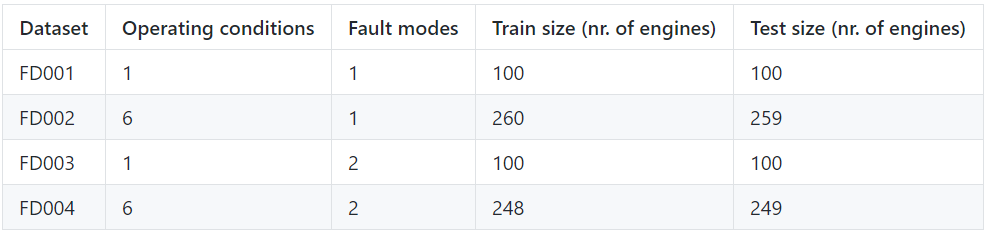

In [5]:
train.head(15)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0         1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1         1            2     0.0019    -0.0003      100.0  518.67  642.15   
2         1            3    -0.0043     0.0003      100.0  518.67  642.35   
3         1            4     0.0007     0.0000      100.0  518.67  642.35   
4         1            5    -0.0019    -0.0002      100.0  518.67  642.37   
5         1            6    -0.0043    -0.0001      100.0  518.67  642.10   
6         1            7     0.0010     0.0001      100.0  518.67  642.48   
7         1            8    -0.0034     0.0003      100.0  518.67  642.56   
8         1            9     0.0008     0.0001      100.0  518.67  642.12   
9         1           10    -0.0033     0.0001      100.0  518.67  641.71   
10        1           11     0.0018    -0.0003      100.0  518.67  642.28   
11        1           12     0.0016     0.0002      100.0  518.67  642.06   
12        1           13    -0.0019     0.0004      100.0  518.67  643.07   
13        1           14     0.0009    -0.0000      100.0  518.67  642.35   
14        1           15    -0.0018    -0.0003      100.0  518.67  642.43   

        s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0   1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1   1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2   1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3   1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4   1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
5   1584.47  1398.37  14.62  ...  521.68  2388.03  8132.85  8.4108  0.03   
6   1592.32  1397.77  14.62  ...  522.32  2388.03  8132.32  8.3974  0.03   
7   1582.96  1400.97  14.62  ...  522.47  2388.03  8131.07  8.4076  0.03   
8   1590.98  1394.80  14.62  ...  521.79  2388.05  8125.69  8.3728  0.03   
9   1591.24  1400.46  14.62  ...  521.79  2388.06  8129.38  8.4286  0.03   
10  1581.75  1400.64  14.62  ...  521.40  2388.01  8140.58  8.4340  0.03   
11  1583.41  1400.15  14.62  ...  521.80  2388.02  8134.25  8.3938  0.03   
12  1582.19  1400.83  14.62  ...  521.85  2388.08  8128.10  8.4152  0.03   
13  1592.95  1399.16  14.62  ...  521.67  2388.00  8134.43  8.3964  0.03   
14  1583.82  1402.13  14.62  ...  522.50  2388.08  8127.56  8.4199  0.03   

    s_17  s_18   s_19   s_20     s_21  
0    392  2388  100.0  39.06  23.4190  
1    392  2388  100.0  39.00  23.4236  
2    390  2388  100.0  38.95  23.3442  
3    392  2388  100.0  38.88  23.3739  
4    393  2388  100.0  38.90  23.4044  
5    391  2388  100.0  38.98  23.3669  
6    392  2388  100.0  39.10  23.3774  
7    391  2388  100.0  38.97  23.3106  
8    392  2388  100.0  39.05  23.4066  
9    393  2388  100.0  38.95  23.4694  
10   392  2388  100.0  38.94  23.4787  
11   391  2388  100.0  39.06  23.3660  
12   393  2388  100.0  38.93  23.2757  
13   393  2388  100.0  39.18  23.3826  
14   391  2388  100.0  38.99  23.3500  

[15 rows x 26 columns]

In [167]:
train[["unit_nr", "time_cycles"]].describe()

unit_nr   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [169]:
test.head(32)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0         1            1     0.0023     0.0003      100.0  518.67  643.02   
1         1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2         1            3     0.0003     0.0001      100.0  518.67  642.46   
3         1            4     0.0042     0.0000      100.0  518.67  642.44   
4         1            5     0.0014     0.0000      100.0  518.67  642.51   
5         1            6     0.0012     0.0003      100.0  518.67  642.11   
6         1            7    -0.0000     0.0002      100.0  518.67  642.11   
7         1            8     0.0006    -0.0000      100.0  518.67  642.54   
8         1            9    -0.0036     0.0000      100.0  518.67  641.88   
9         1           10    -0.0025    -0.0001      100.0  518.67  642.07   
10        1           11     0.0007    -0.0004      100.0  518.67  642.04   
11        1           12     0.0026     0.0003      100.0  518.67  642.54   
12        1           13    -0.0056     0.0003      100.0  518.67  641.94   
13        1           14     0.0017    -0.0004      100.0  518.67  642.23   
14        1           15    -0.0003    -0.0003      100.0  518.67  642.50   
15        1           16    -0.0018     0.0003      100.0  518.67  642.32   
16        1           17     0.0014     0.0002      100.0  518.67  642.19   
17        1           18     0.0035     0.0001      100.0  518.67  642.59   
18        1           19     0.0029     0.0001      100.0  518.67  642.43   
19        1           20     0.0011    -0.0001      100.0  518.67  642.61   
20        1           21     0.0038    -0.0002      100.0  518.67  642.70   
21        1           22     0.0012     0.0001      100.0  518.67  642.45   
22        1           23     0.0009    -0.0000      100.0  518.67  642.12   
23        1           24    -0.0006    -0.0001      100.0  518.67  642.32   
24        1           25     0.0028    -0.0003      100.0  518.67  642.25   
25        1           26     0.0047    -0.0005      100.0  518.67  642.48   
26        1           27    -0.0007     0.0001      100.0  518.67  642.08   
27        1           28     0.0022     0.0005      100.0  518.67  641.93   
28        1           29     0.0014     0.0001      100.0  518.67  641.95   
29        1           30    -0.0025     0.0004      100.0  518.67  642.79   
30        1           31    -0.0006     0.0004      100.0  518.67  642.58   
31        2            1    -0.0009     0.0004      100.0  518.67  642.66   

        s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0   1585.29  1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   
1   1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   
2   1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   
3   1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   
4   1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   
5   1579.12  1395.13  14.62  ...  521.92  2388.08  8127.46  8.4238  0.03   
6   1583.34  1404.84  14.62  ...  522.01  2388.06  8134.97  8.3914  0.03   
7   1580.89  1400.89  14.62  ...  522.09  2388.06  8125.93  8.4213  0.03   
8   1593.29  1412.28  14.62  ...  522.03  2388.05  8134.15  8.4353  0.03   
9   1585.25  1398.64  14.62  ...  522.00  2388.06  8134.08  8.4093  0.03   
10  1581.03  1403.83  14.62  ...  521.95  2388.06  8132.38  8.3919  0.03   
11  1587.43  1397.82  14.62  ...  522.01  2388.06  8132.33  8.3984  0.03   
12  1589.09  1403.94  14.62  ...  522.37  2388.03  8131.12  8.4166  0.03   
13  1583.16  1402.88  14.62  ...  521.95  2388.06  8130.30  8.4293  0.03   
14  1584.81  1398.79  14.62  ...  521.38  2388.00  8133.62  8.4163  0.03   
15  1584.51  1407.76  14.62  ...  522.16  2388.10  8133.83  8.4300  0.03   
16  1582.70  1404.12  14.62  ...  522.09  2388.02  8126.78  8.4577  0.03   
17  1586.53  1403.69  14.62  ...  522.14  2388.06  8133.22  8.4323  0.03   
18  1585.58  1402.

In [7]:

y_test

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [8]:
# inspect time cycles
train[index_names].groupby('unit_nr').max()

time_cycles
unit_nr             
1                192
2                287
3                179
4                189
5                269
...              ...
96               336
97               202
98               156
99               185
100              200

[100 rows x 1 columns]

In [9]:
# inspect settings
train[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [10]:
# inspect sensor values
train[sensor_names].describe()

s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

                s_6           s_7           s_8           s_9          s_10  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean      21.609803    553.367711   2388.096652   9065.242941  1.300000e+00   
std        0.001389      0.885092      0.070985     22.082880  4.660829e-13   
min       21.600000    549.850000   2387.900000   9021.730000  1.300000e+00   
25%       21.610000    552.810000   2388.050000   9053.100000  1.300000e+00   
50%       21.610000    553.440000   2388.090000   9060.660000  1.300000e+00   
75%       21.610000    554.010000   2388.140000   9069.420000  1.300000e+00   
max       21.610000    556.060000   2388.560000   9244.590000  1.300000e+00   

       ...          s_12          s_13          s_14          s_15  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

               s_16          s_17     s_18     s_19          s_20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

               s_21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 21 columns]

In [11]:

# total number of cycles for each unit 
grouped_by_unit = train.groupby(by="unit_nr")
max_cycle = grouped_by_unit["time_cycles"].max()
max_cycle

unit_nr
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64

In [12]:

# Merge the max cycle back into the original frame
result_frame = train.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
result_frame

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  max_cycle  
0      2388  100.0  39.06  23.4190        192  
1      2388  100.0  39.00  23.4236        192  
2      2388  100.0  38.95  23.3442        192  
3      2388  100.0  38.88  23.3739        192  
4      2388  100.0  38.90  23.4044        192  
...     ...    ...    ...      ...        ...  
20626  2388  100.0  38.49  22.9735        200  
20627  2388  100.0  38.30  23.1594        200  
20628  2388  100.0  38.44  22.9333        200  
20629  2388  100.0  38.29  23.0640        200  
20630  2388  100.0  38.37  23.0522        200  

[20631 rows x 27 columns]

In [13]:
# Computing Remaining useful life
remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
result_frame["RUL"] = remaining_useful_life
result_frame[180:195]

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
180        1          181    -0.0006     0.0005      100.0  518.67  643.44   
181        1          182    -0.0010     0.0003      100.0  518.67  644.21   
182        1          183     0.0001     0.0001      100.0  518.67  643.24   
183        1          184     0.0004     0.0003      100.0  518.67  644.07   
184        1          185     0.0008     0.0001      100.0  518.67  643.80   
185        1          186     0.0027    -0.0003      100.0  518.67  643.51   
186        1          187    -0.0047    -0.0000      100.0  518.67  643.32   
187        1          188    -0.0067     0.0003      100.0  518.67  643.75   
188        1          189    -0.0006     0.0002      100.0  518.67  644.18   
189        1          190    -0.0027     0.0001      100.0  518.67  643.64   
190        1          191    -0.0000    -0.0004      100.0  518.67  643.34   
191        1          192     0.0009    -0.0000      100.0  518.67  643.54   
192        2            1    -0.0018     0.0006      100.0  518.67  641.89   
193        2            2     0.0043    -0.0003      100.0  518.67  641.82   
194        2            3     0.0018     0.0003      100.0  518.67  641.55   

         s_3      s_4    s_5  ...     s_14    s_15  s_16  s_17  s_18   s_19  \
180  1596.71  1420.64  14.62  ...  8114.79  8.4720  0.03   397  2388  100.0   
181  1602.08  1426.62  14.62  ...  8119.67  8.5158  0.03   397  2388  100.0   
182  1597.23  1419.03  14.62  ...  8117.80  8.5041  0.03   396  2388  100.0   
183  1605.44  1432.52  14.62  ...  8115.61  8.5133  0.03   395  2388  100.0   
184  1603.46  1424.40  14.62  ...  8113.69  8.4984  0.03   395  2388  100.0   
185  1595.16  1426.30  14.62  ...  8123.45  8.5227  0.03   397  2388  100.0   
186  1592.10  1427.27  14.62  ...  8115.67  8.5218  0.03   396  2388  100.0   
187  1602.38  1422.78  14.62  ...  8117.69  8.5207  0.03   396  2388  100.0   
188  1596.17  1428.01  14.62  ...  8117.51  8.5183  0.03   395  2388  100.0   
189  1599.22  1425.95  14.62  ...  8112.58  8.5223  0.03   398  2388  100.0   
190  1602.36  1425.77  14.62  ...  8114.61  8.5174  0.03   394  2388  100.0   
191  1601.41  1427.20  14.62  ...  8110.93  8.5113  0.03   396  2388  100.0   
192  1583.84  1391.28  14.62  ...  8137.72  8.3905  0.03   391  2388  100.0   
193  1587.05  1393.13  14.62  ...  8131.09  8.4167  0.03   392  2388  100.0   
194  1588.32  1398.96  14.62  ...  8140.58  8.3802  0.03   391  2388  100.0   

      s_20     s_21  max_cycle  RUL  
180  38.34  23.1652        192   11  
181  38.43  23.1787        192   10  
182  38.56  23.1302        192    9  
183  38.43  23.0146        192    8  
184  38.51  23.0700        192    7  
185  38.47  23.0564        192    6  
186  38.42  23.0822        192    5  
187  38.51  22.9588        192    4  
188  38.48  23.1127        192    3  
189  38.49  23.0675        192    2  
190  38.45  23.1295        192    1  
191  38.48  22.9649        192    0  
192  38.94  23.4585        287  286  
193  39.06  23.4085        287  285  
194  39.11  23.4250        287  284  

[15 rows x 28 columns]

In [14]:
# drop max_cycle
result_frame = result_frame.drop("max_cycle", axis=1)


In [15]:
result_frame[result_frame['unit_nr']==1]

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0          1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1          1            2     0.0019    -0.0003      100.0  518.67  642.15   
2          1            3    -0.0043     0.0003      100.0  518.67  642.35   
3          1            4     0.0007     0.0000      100.0  518.67  642.35   
4          1            5    -0.0019    -0.0002      100.0  518.67  642.37   
..       ...          ...        ...        ...        ...     ...     ...   
187        1          188    -0.0067     0.0003      100.0  518.67  643.75   
188        1          189    -0.0006     0.0002      100.0  518.67  644.18   
189        1          190    -0.0027     0.0001      100.0  518.67  643.64   
190        1          191    -0.0000    -0.0004      100.0  518.67  643.34   
191        1          192     0.0009    -0.0000      100.0  518.67  643.54   

         s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0    1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1    1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2    1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3    1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4    1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388   
..       ...      ...    ...  ...      ...      ...     ...   ...   ...   ...   
187  1602.38  1422.78  14.62  ...  2388.23  8117.69  8.5207  0.03   396  2388   
188  1596.17  1428.01  14.62  ...  2388.33  8117.51  8.5183  0.03   395  2388   
189  1599.22  1425.95  14.62  ...  2388.35  8112.58  8.5223  0.03   398  2388   
190  1602.36  1425.77  14.62  ...  2388.30  8114.61  8.5174  0.03   394  2388   
191  1601.41  1427.20  14.62  ...  2388.32  8110.93  8.5113  0.03   396  2388   

      s_19   s_20     s_21  RUL  
0    100.0  39.06  23.4190  191  
1    100.0  39.00  23.4236  190  
2    100.0  38.95  23.3442  189  
3    100.0  38.88  23.3739  188  
4    100.0  38.90  23.4044  187  
..     ...    ...      ...  ...  
187  100.0  38.51  22.9588    4  
188  100.0  38.48  23.1127    3  
189  100.0  38.49  23.0675    2  
190  100.0  38.45  23.1295    1  
191  100.0  38.48  22.9649    0  

[192 rows x 27 columns]

# Feature Analysis

In [16]:
sensors = list(result_frame.columns[5:26])
settings = list(result_frame.columns[2:5])
print(sensors)
print(settings)

['s_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']
['setting_1', 'setting_2', 'setting_3']


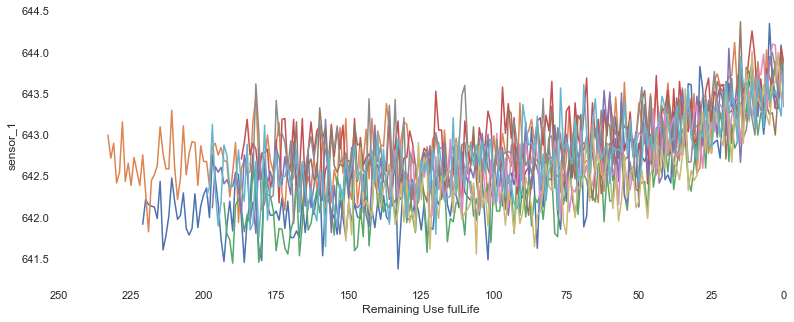

In [17]:
# sensor_name = result_frame['s_2']
# Rul = result_frame['RUL']
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(13,5))
for i in result_frame['unit_nr'].unique():
    if (i % 10 == 0):  # only plot every 10th unit_nr
        plt.plot('RUL', 's_2', 
             data=result_frame[result_frame['unit_nr']==i])
plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
plt.ylabel('sensor_1')
plt.xlabel('Remaining Use fulLife')
plt.show()

In [18]:
def plot_featues(sensor_name, df):
    plt.figure(figsize=(13,5))
    plt.rcParams['axes.facecolor'] = 'white'
    for i in df['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', str(sensor_name), 
                    data=df[df['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

Plot of s_1 Vs RUL


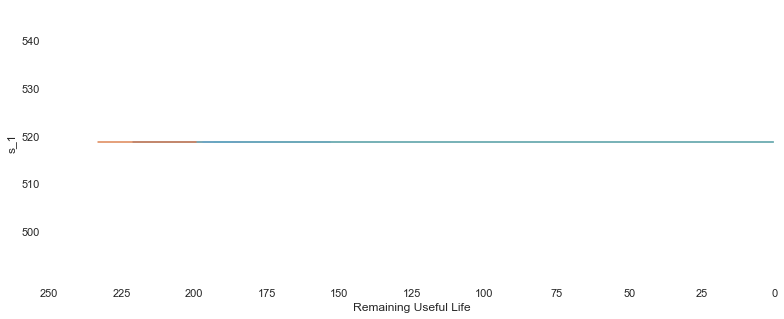

Plot of s_2 Vs RUL


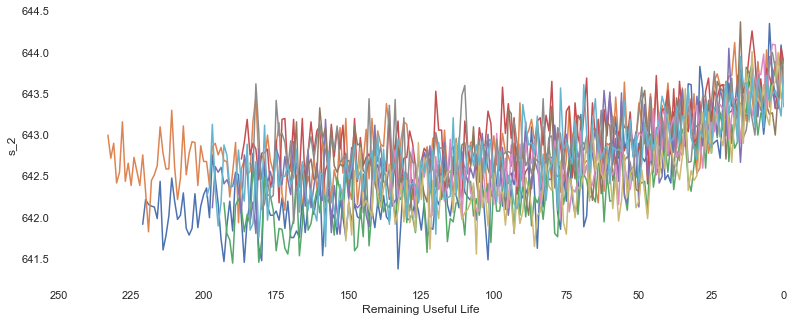

Plot of s_3 Vs RUL


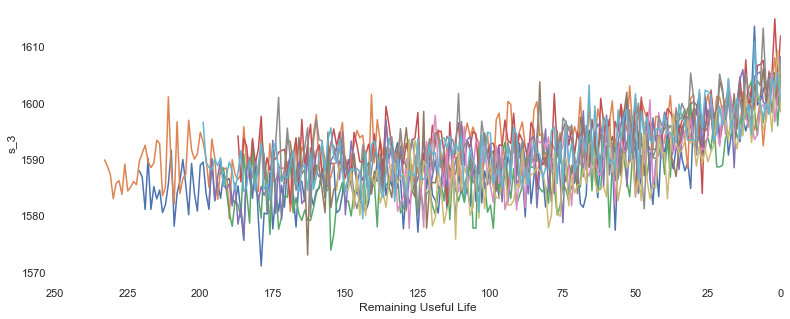

Plot of s_4 Vs RUL


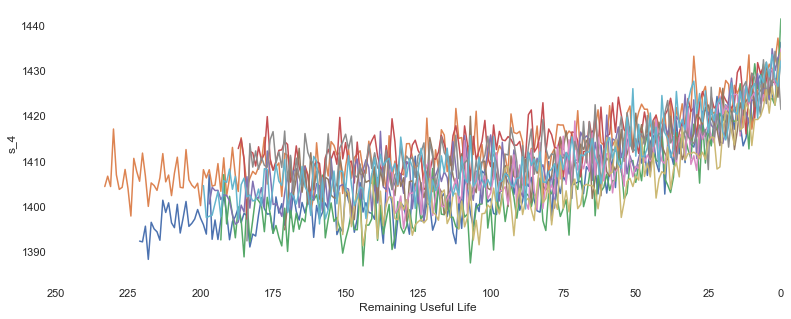

Plot of s_5 Vs RUL


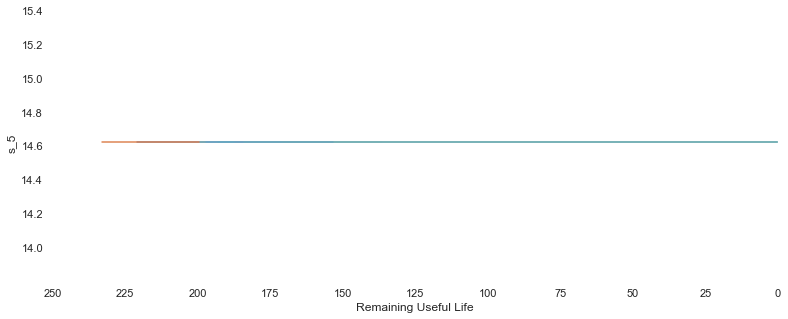

Plot of s_6 Vs RUL


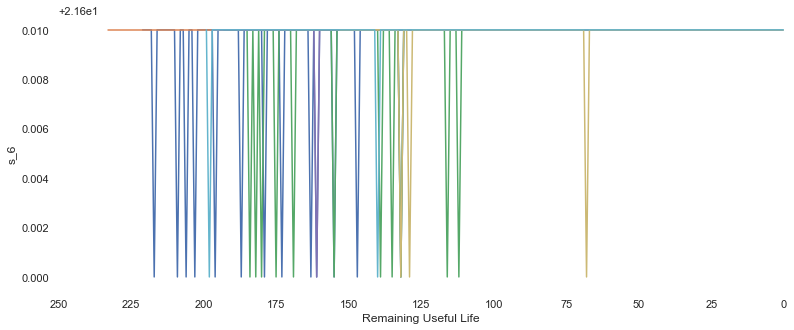

Plot of s_7 Vs RUL


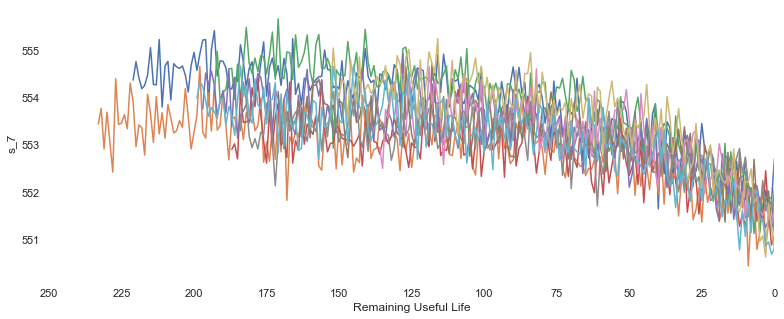

Plot of s_8 Vs RUL


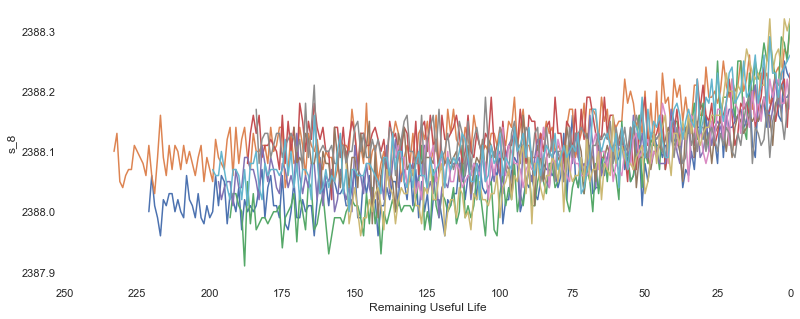

Plot of s_9 Vs RUL


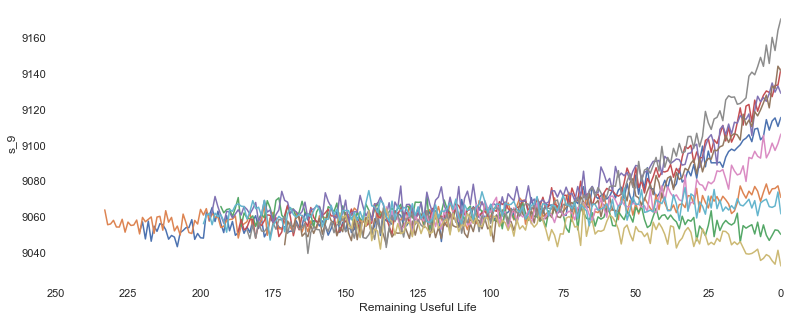

Plot of s_10 Vs RUL


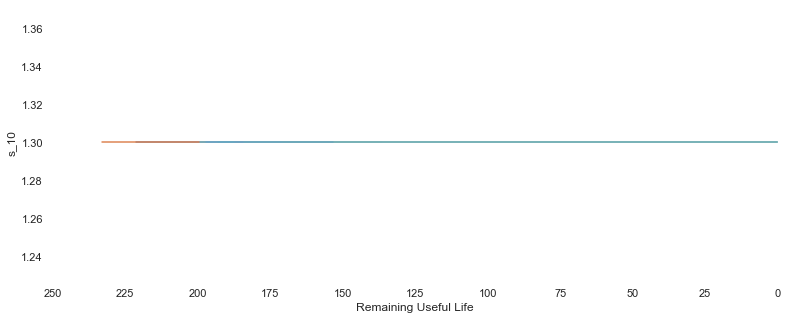

Plot of s_11 Vs RUL


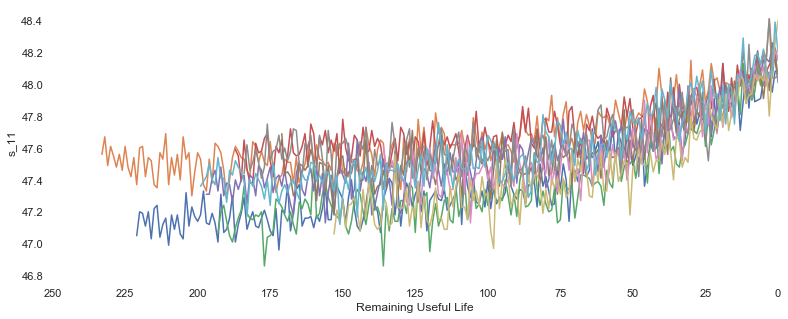

Plot of s_12 Vs RUL


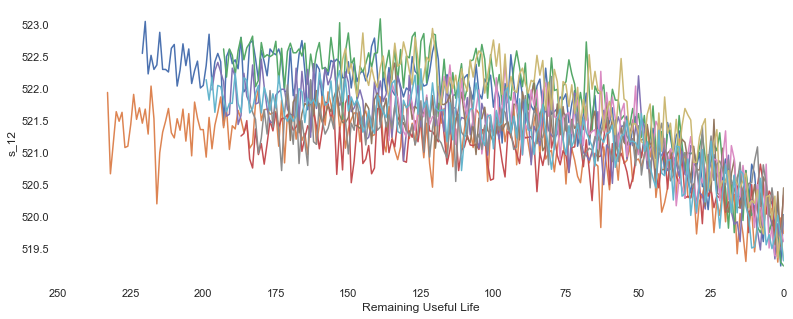

Plot of s_13 Vs RUL


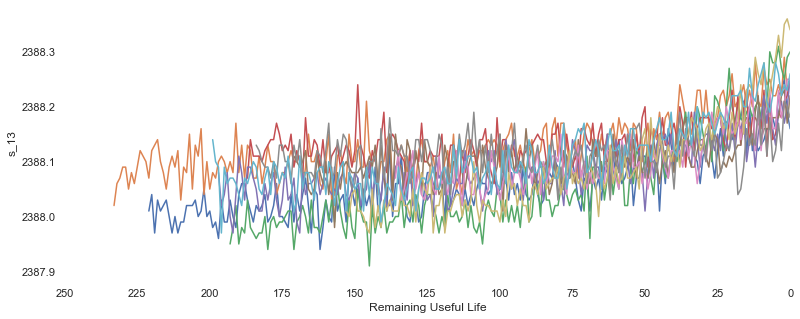

Plot of s_14 Vs RUL


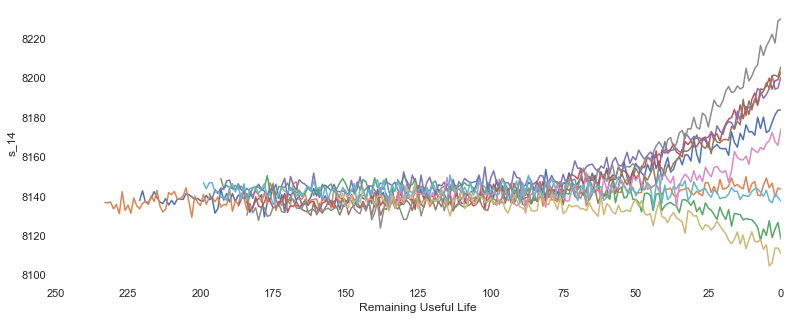

Plot of s_15 Vs RUL


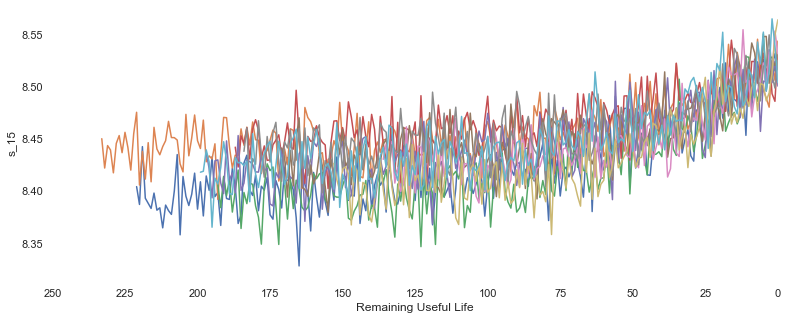

Plot of s_16 Vs RUL


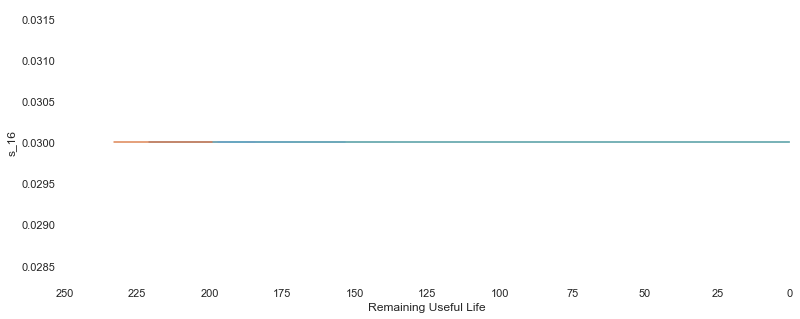

Plot of s_17 Vs RUL


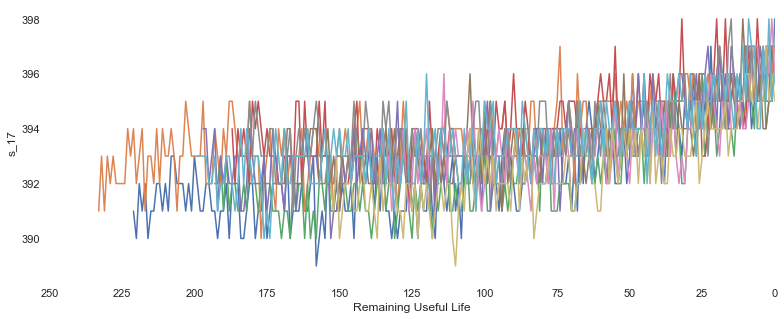

Plot of s_18 Vs RUL


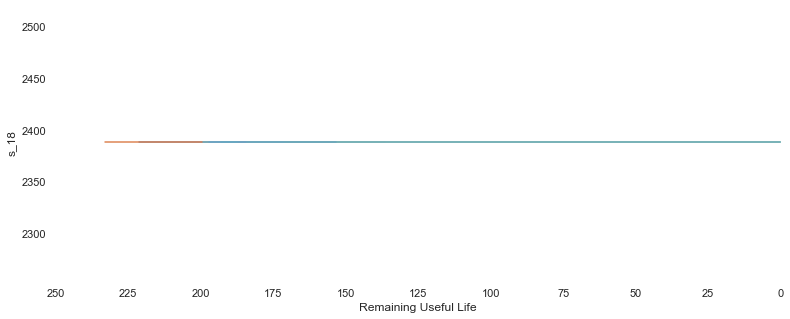

Plot of s_19 Vs RUL


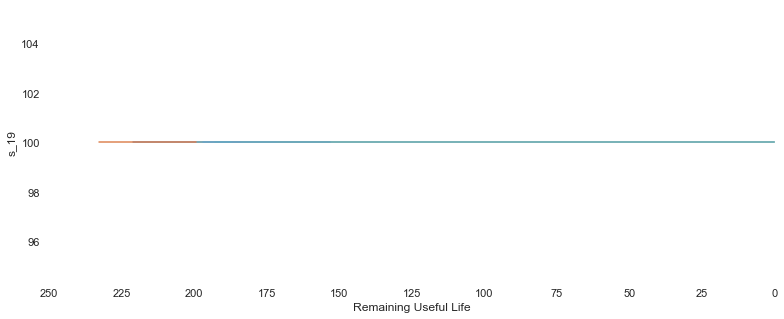

Plot of s_20 Vs RUL


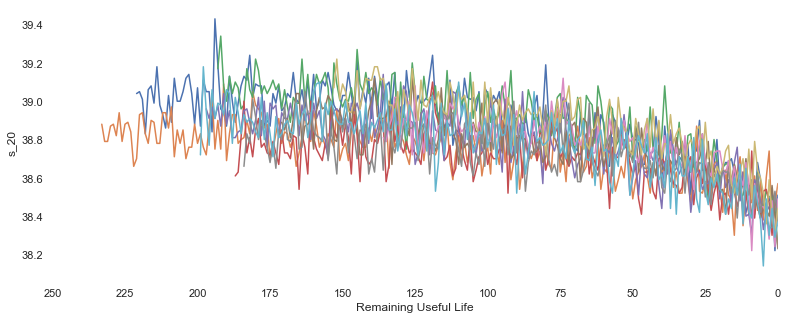

Plot of s_21 Vs RUL


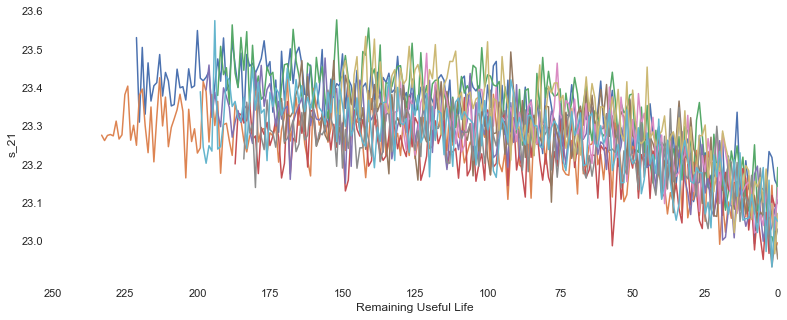

In [19]:

for sensor in sensors:
    print("Plot of {} Vs RUL".format(sensor))
    plot_featues(sensor, result_frame)

Plot of setting_1 Vs RUL


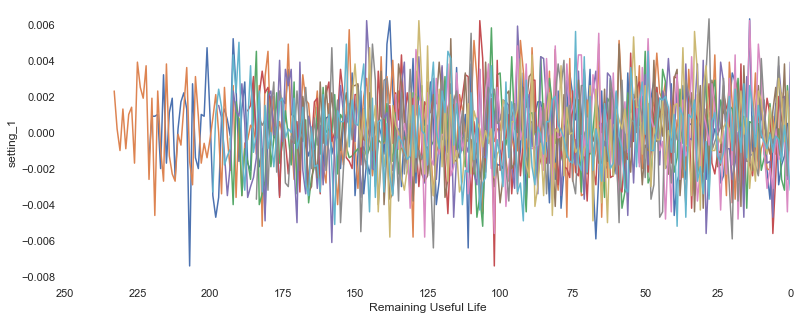

Plot of setting_2 Vs RUL


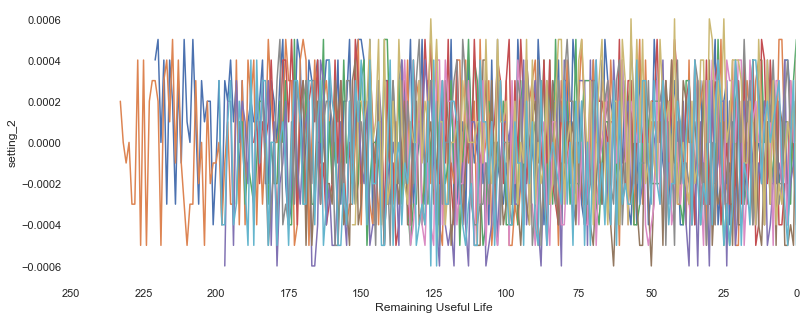

Plot of setting_3 Vs RUL


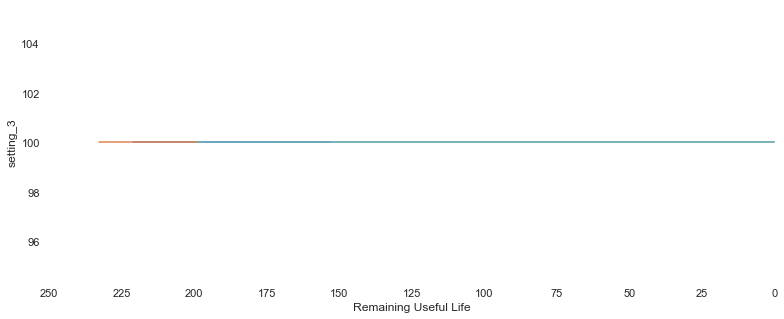

In [20]:

for setting in settings:
    print("Plot of {} Vs RUL".format(setting))
    plot_featues(setting,result_frame)

In [21]:
# EDA on test data
grouped_by_unit_test = test.groupby(by="unit_nr")
max_cycle_test = grouped_by_unit_test["time_cycles"].max()
test_df = test.merge(max_cycle_test.to_frame(name='max_cycle_test'), left_on='unit_nr', right_index=True)


test_df["RUL"] = test_df["max_cycle_test"] - test_df["time_cycles"]


In [22]:
test_df[(test_df["unit_nr"] == 1)].tail()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
26        1           27    -0.0007     0.0001      100.0  518.67  642.08   
27        1           28     0.0022     0.0005      100.0  518.67  641.93   
28        1           29     0.0014     0.0001      100.0  518.67  641.95   
29        1           30    -0.0025     0.0004      100.0  518.67  642.79   
30        1           31    -0.0006     0.0004      100.0  518.67  642.58   

        s_3      s_4    s_5  ...     s_14    s_15  s_16  s_17  s_18   s_19  \
26  1586.65  1400.31  14.62  ...  8127.24  8.4494  0.03   392  2388  100.0   
27  1594.25  1401.29  14.62  ...  8134.89  8.4470  0.03   392  2388  100.0   
28  1587.15  1398.11  14.62  ...  8133.13  8.4212  0.03   392  2388  100.0   
29  1585.72  1400.97  14.62  ...  8134.79  8.4110  0.03   391  2388  100.0   
30  1581.22  1398.91  14.62  ...  8130.11  8.4024  0.03   393  2388  100.0   

     s_20     s_21  max_cycle_test  RUL  
26  38.87  23.3931              31    4  
27  38.83  23.3502              31    3  
28  39.02  23.3621              31    2  
29  39.09  23.4069              31    1  
30  38.81  23.3552              31    0  

[5 rows x 28 columns]

In [23]:
test_df.describe()

unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000      0.000000      0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...          s_14          s_15          s_16          s_17     s_18  \
count  ...  13096.000000  13096.000000  1.309600e+04  13096.000000  13096.0   
mean   ...   8138.947817      8.425844  3.000000e-02    392.571625   2388.0   
std    ...     10.188605      0.029009  8.823140e-15      1.233577      0.0   
min    ...   8108.500000      8.332800  3.000000e-02    389.000000   2388.0   
25%    ...   8132.310000      8.405600  3.000000e-02    392.000000   2388.0   
50%    ...   8138.390000      8.424900  3.000000e-02    393.000000   2388.0   
75%    ...   8144.360000      8.444300  3.000000e-02    393.000000   2388.0   
max    ...   8220.480000      8.541400  3.000000e-02    397.000000   2388.0   

          s_19          s_20          s_21  max_cycle_test           RUL  
count  13096.0  13096.000000  13096.000000    13096.000000  13096.000000  
mean     100.0     38.892502     23.335743      152.673030     75.836515  
std        0.0      0.141681      0.084120       51.165573     53.057749  
min      100.0     38.310000     22.935400       31.000000      0.000000  
25%      100.0     38.800000     23.281600      125.000000     32.000000  
50%      100.0     38.900000     23.339200      152.000000     68.000000  
75%      100.0     38.990000     23.393600      186.000000    112.000000  
max      100.0     39.410000     23.641900      303.000000    302.000000  

[8 rows x 28 columns]

In [152]:
def plot_dist(df, engine_num=None):
    '''plot all non trivial measurements and states'''
    
    cols = df.columns
    n_cols = min(len(cols), 5)
    n_rows = int(np.ceil(len(cols) / n_cols))
    
    sns.set()
    plt.rcParams['axes.facecolor'] = 'white'
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,12))
    axes = axes.flatten()
    if engine_num != None: 
        fig.suptitle('distributions for engine #: {}'.format(engine_num))
        df_plot = df.loc[engine_num]
    else: 
        fig.suptitle('distributions for all engines')
        df_plot = df
    for col, ax in zip(cols, axes):
        ax=sns.distplot(df_plot[col], ax=ax, label=col)
        ax.legend(loc=1)
#         labels(col, "p", ax)
    return fig

import warnings
warnings.filterwarnings("ignore")

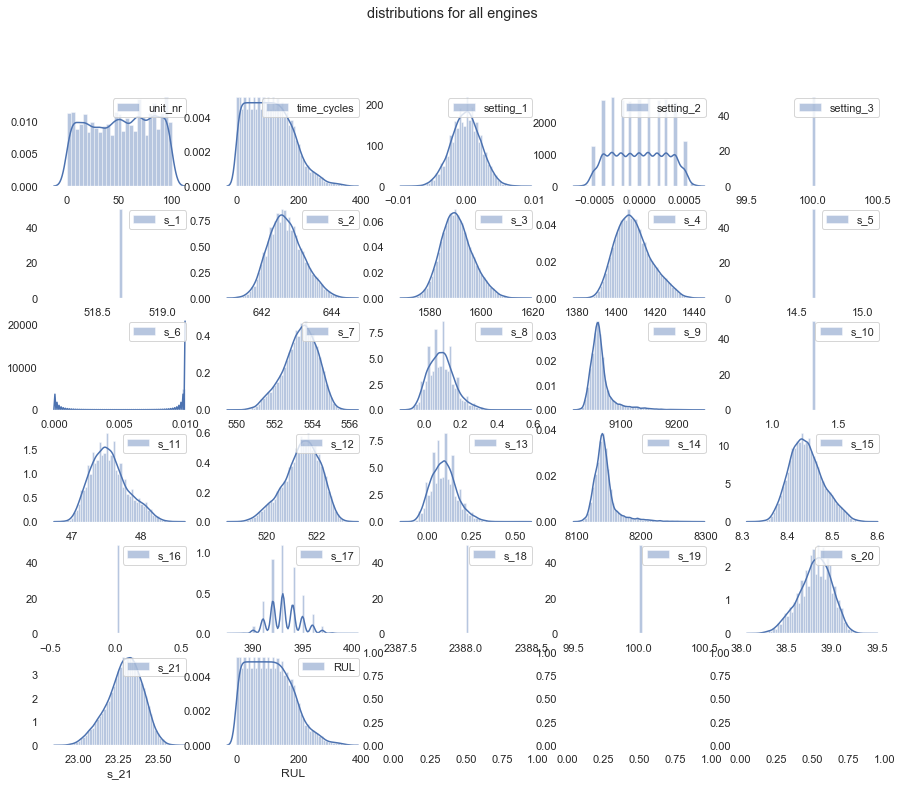

In [153]:
fig=plot_dist(result_frame)

Plot of s_1 Vs RUL


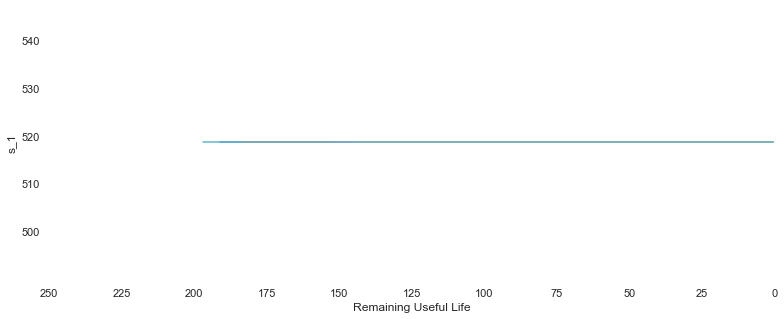

Plot of s_2 Vs RUL


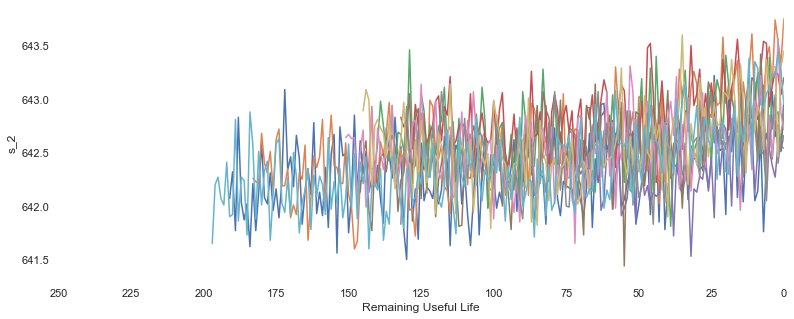

Plot of s_3 Vs RUL


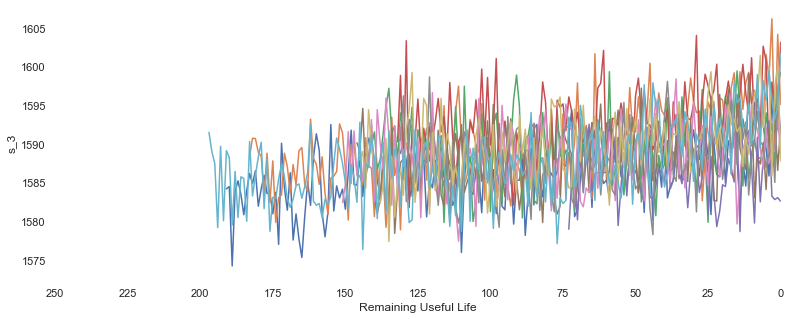

Plot of s_4 Vs RUL


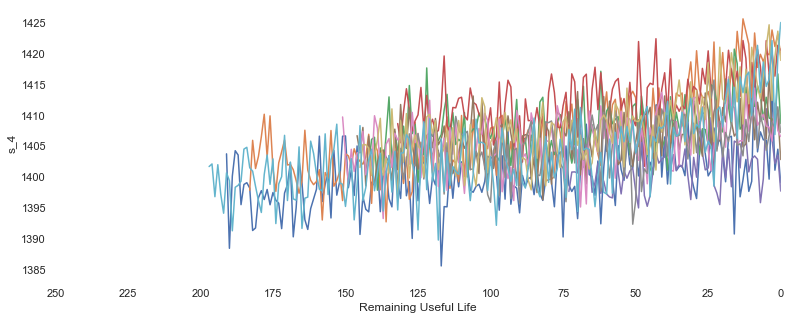

Plot of s_5 Vs RUL


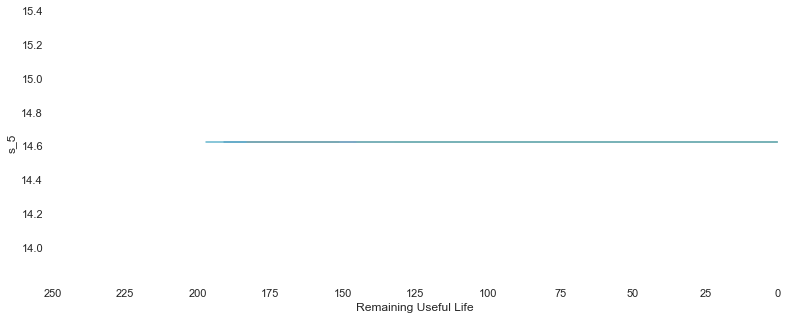

Plot of s_6 Vs RUL


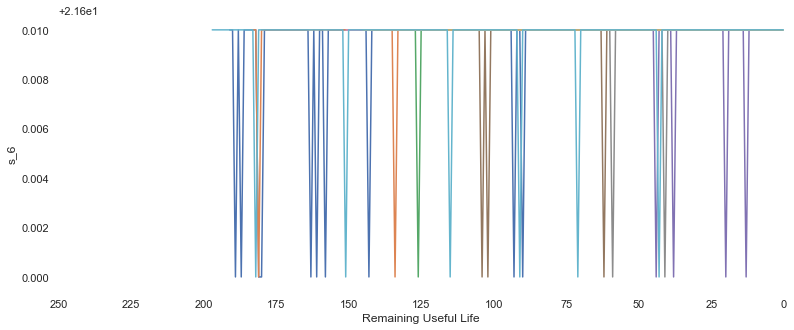

Plot of s_7 Vs RUL


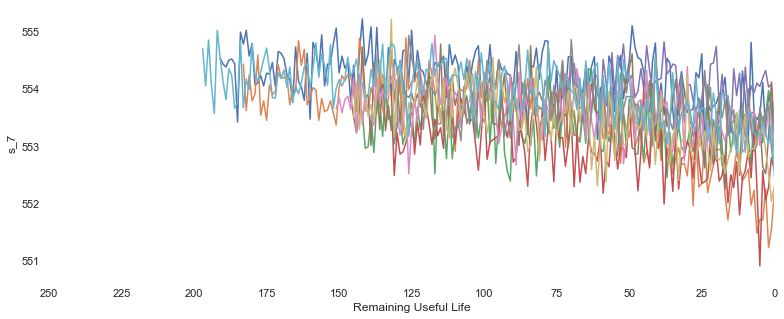

Plot of s_8 Vs RUL


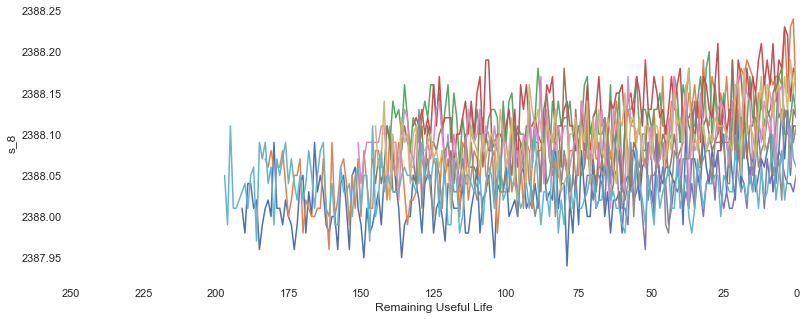

Plot of s_9 Vs RUL


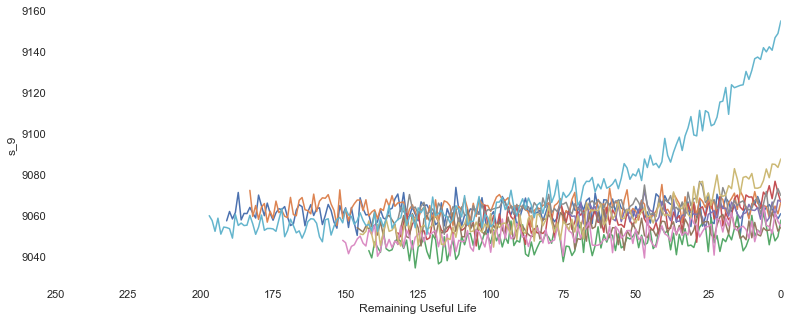

Plot of s_10 Vs RUL


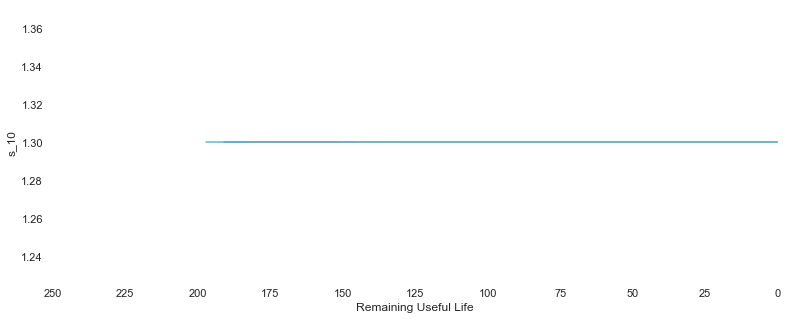

Plot of s_11 Vs RUL


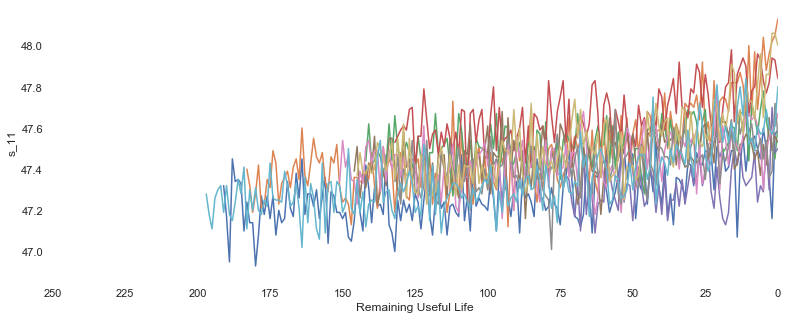

Plot of s_12 Vs RUL


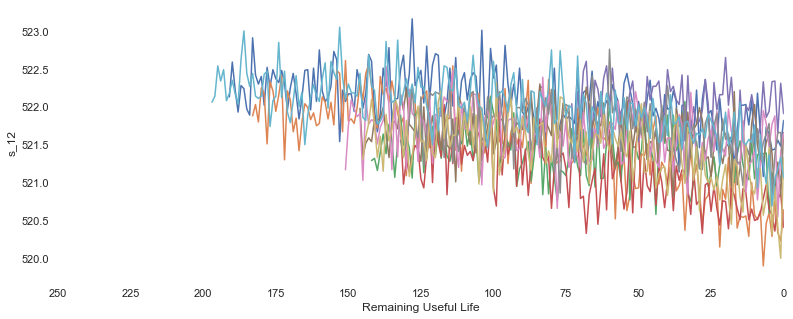

Plot of s_13 Vs RUL


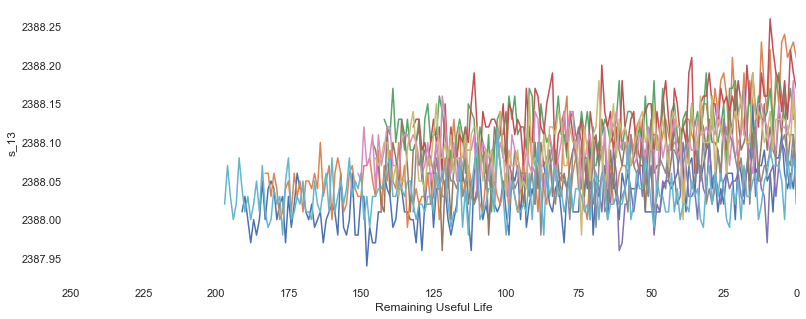

Plot of s_14 Vs RUL


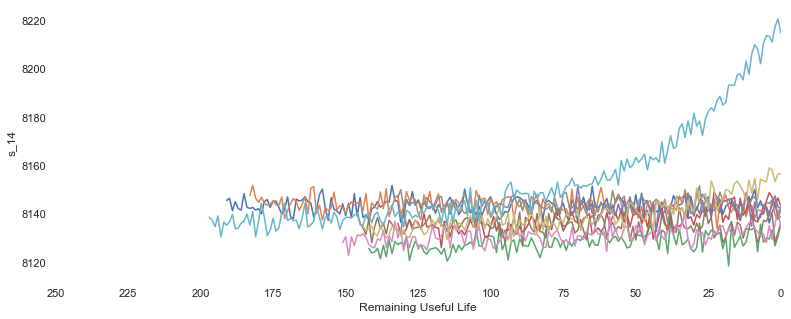

Plot of s_15 Vs RUL


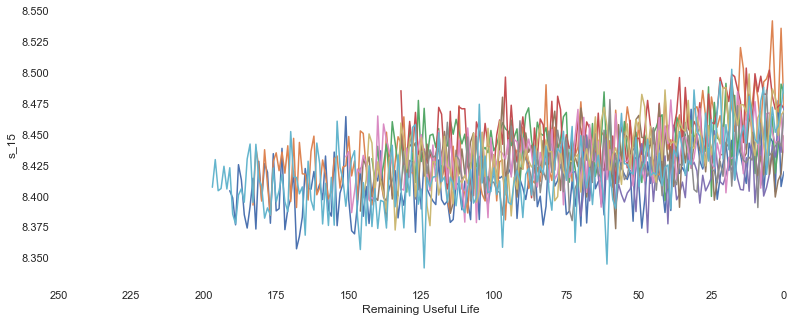

Plot of s_16 Vs RUL


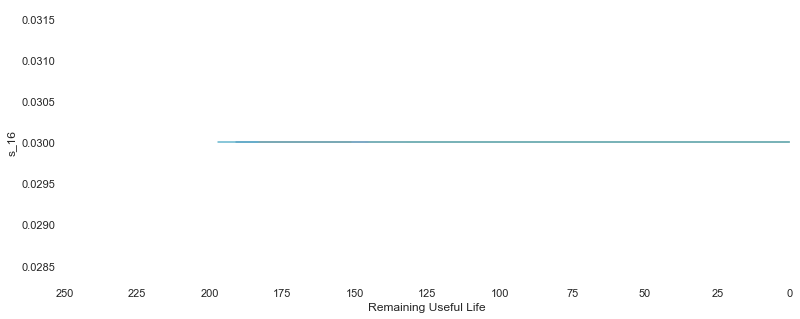

Plot of s_17 Vs RUL


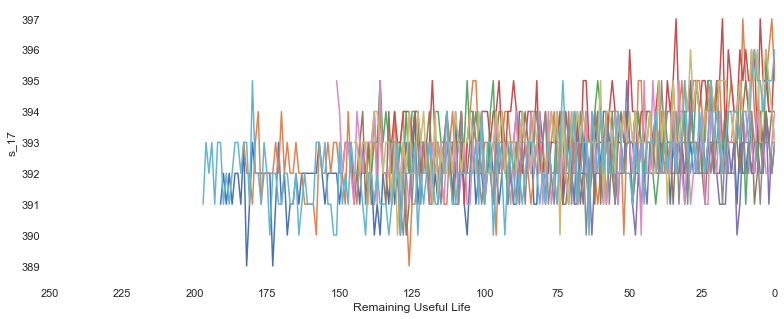

Plot of s_18 Vs RUL


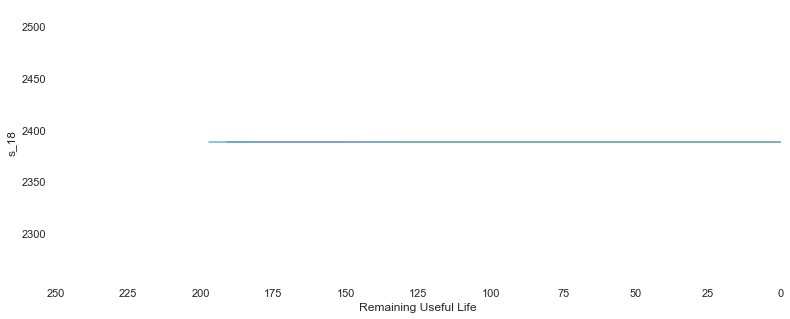

Plot of s_19 Vs RUL


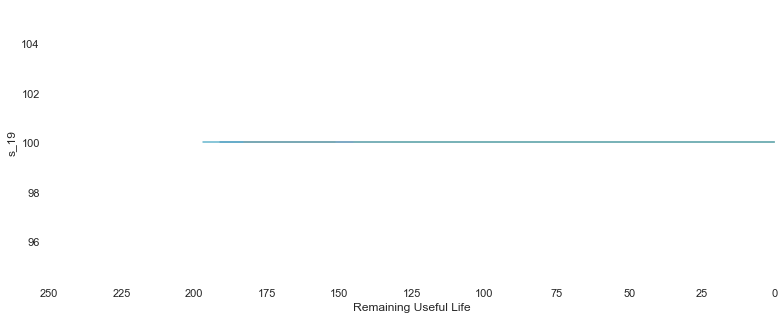

Plot of s_20 Vs RUL


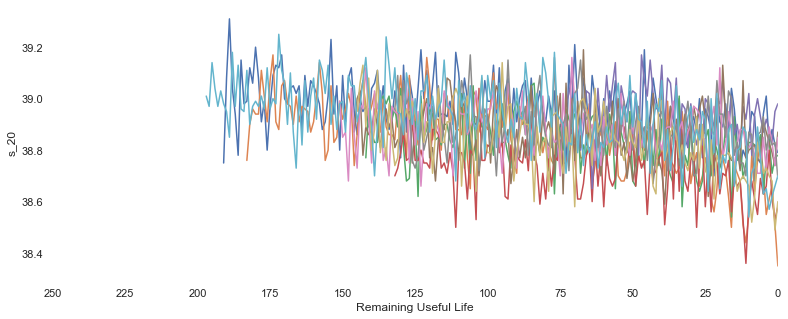

Plot of s_21 Vs RUL


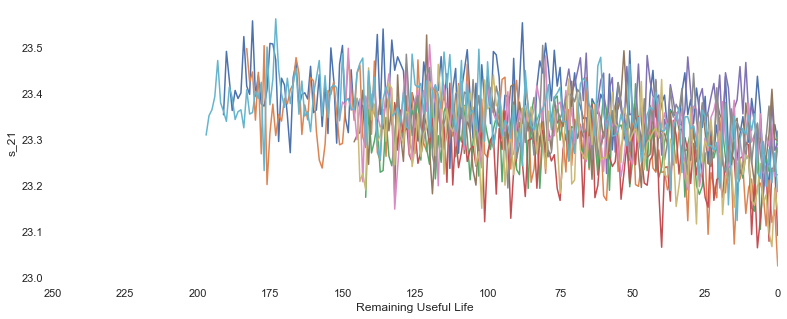

In [24]:
# Plot sensor values for test data
for sensor in sensors:
    print("Plot of {} Vs RUL".format(sensor))
    plot_featues(sensor, test_df)

Plot of setting_1 Vs RUL


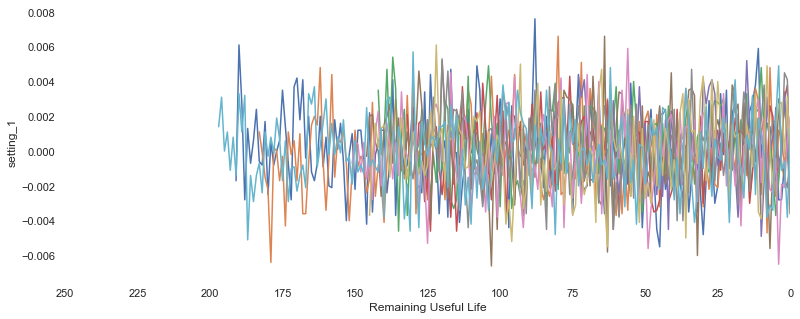

Plot of setting_2 Vs RUL


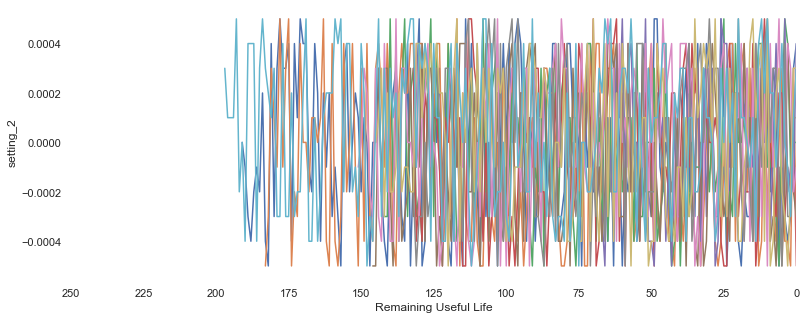

Plot of setting_3 Vs RUL


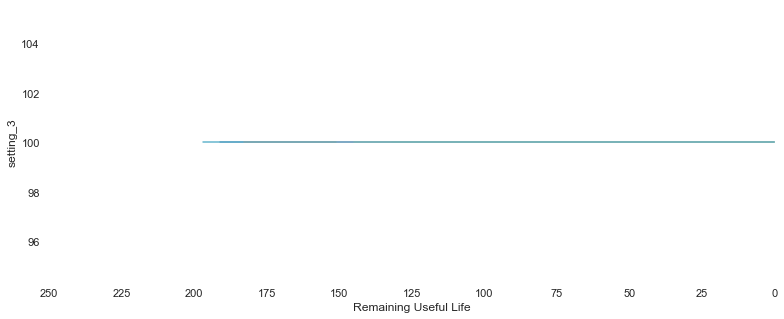

In [25]:
# Plot settings for test data
for setting in settings:
    print("Plot of {} Vs RUL".format(setting))
    plot_featues(setting, test_df)

In [26]:
train

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  39.06  23.4190  
1       392  2388  100.0  39.00  23.4236  
2       390  2388  100.0  38.95  23.3442  
3       392  2388  100.0  38.88  23.3739  
4       393  2388  100.0  38.90  23.4044  
...     ...   ...    ...    ...      ...  
20626   397  2388  100.0  38.49  22.9735  
20627   395  2388  100.0  38.30  23.1594  
20628   398  2388  100.0  38.44  22.9333  
20629   395  2388  100.0  38.29  23.0640  
20630   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

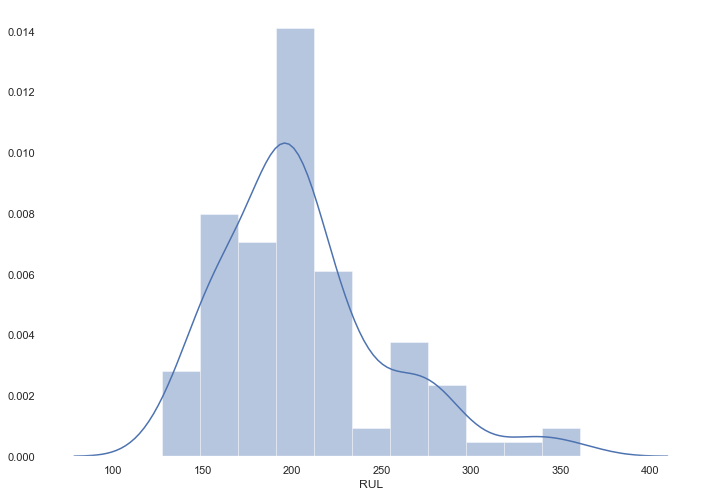

In [27]:
# Distribution plot of RUL in train data
import seaborn as sns
df_max_rul = result_frame[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df_max_rul['RUL'])

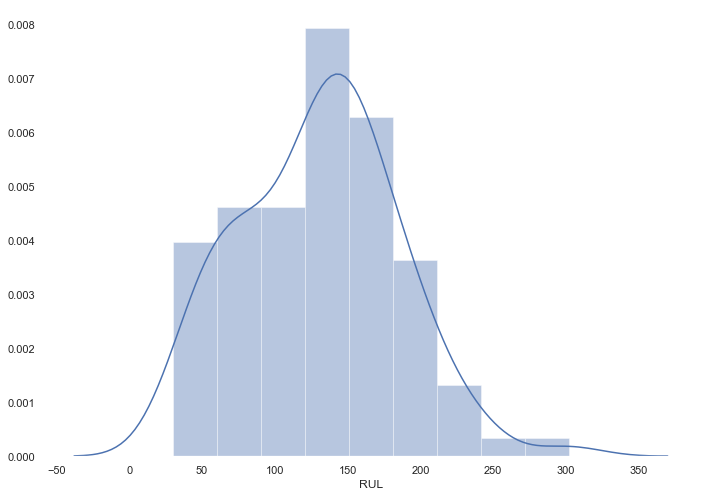

In [28]:
# Distribution plot of RUL in test data


df_max_rul = test_df[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df_max_rul['RUL'])

## Compute truth RUL in test data 

In [29]:
print(len(test_df))
print(len(y_test))

13096
100


In [30]:
y_test = y_test.reset_index()
y_test.rename(columns= {"index" : "unit_nr"}, inplace = True)

In [31]:
y_test['unit_nr'] =  y_test['unit_nr'] + 1
y_test

unit_nr  RUL
0         1  112
1         2   98
2         3   69
3         4   82
4         5   91
..      ...  ...
95       96  137
96       97   82
97       98   59
98       99  117
99      100   20

[100 rows x 2 columns]

In [32]:
# Current RUL as per the test records
test_df.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5  ...     s_14    s_15  s_16  s_17  s_18   s_19  \
0  1585.29  1398.21  14.62  ...  8125.55  8.4052  0.03   392  2388  100.0   
1  1588.45  1395.42  14.62  ...  8139.62  8.3803  0.03   393  2388  100.0   
2  1586.94  1401.34  14.62  ...  8130.10  8.4441  0.03   393  2388  100.0   
3  1584.12  1406.42  14.62  ...  8132.90  8.3917  0.03   391  2388  100.0   
4  1587.19  1401.92  14.62  ...  8129.54  8.4031  0.03   390  2388  100.0   

    s_20     s_21  max_cycle_test  RUL  
0  38.86  23.3735              31   30  
1  39.02  23.3916              31   29  
2  39.08  23.4166              31   28  
3  39.00  23.3737              31   27  
4  38.99  23.4130              31   26  

[5 rows x 28 columns]

In [33]:
test_df = test_df.merge(y_test,how='left', on="unit_nr")

In [34]:
test_df["RUL"] = test_df["RUL_x"] + test_df["RUL_y"]

In [35]:
test_df.describe()

unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000      0.000000      0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...          s_16          s_17     s_18     s_19          s_20  \
count  ...  1.309600e+04  13096.000000  13096.0  13096.0  13096.000000   
mean   ...  3.000000e-02    392.571625   2388.0    100.0     38.892502   
std    ...  8.823140e-15      1.233577      0.0      0.0      0.141681   
min    ...  3.000000e-02    389.000000   2388.0    100.0     38.310000   
25%    ...  3.000000e-02    392.000000   2388.0    100.0     38.800000   
50%    ...  3.000000e-02    393.000000   2388.0    100.0     38.900000   
75%    ...  3.000000e-02    393.000000   2388.0    100.0     38.990000   
max    ...  3.000000e-02    397.000000   2388.0    100.0     39.410000   

               s_21  max_cycle_test         RUL_x         RUL_y           RUL  
count  13096.000000    13096.000000  13096.000000  13096.000000  13096.000000  
mean      23.335743      152.673030     75.836515     65.401955    141.238470  
std        0.084120       51.165573     53.057749     41.389433     58.980114  
min       22.935400       31.000000      0.000000      7.000000      7.000000  
25%       23.281600      125.000000     32.000000     21.000000    102.000000  
50%       23.339200      152.000000     68.000000     61.000000    140.000000  
75%       23.393600      186.000000    112.000000     97.000000    179.000000  
max       23.641900      303.000000    302.000000    145.000000    340.000000  

[8 rows x 30 columns]

In [149]:
# COmputed RUL for test data
test_df.head(10)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   
5        1            6     0.0012     0.0003      100.0  518.67  642.11   
6        1            7    -0.0000     0.0002      100.0  518.67  642.11   
7        1            8     0.0006    -0.0000      100.0  518.67  642.54   
8        1            9    -0.0036     0.0000      100.0  518.67  641.88   
9        1           10    -0.0025    -0.0001      100.0  518.67  642.07   

       s_3      s_4    s_5  ...  s_16  s_17  s_18   s_19   s_20     s_21  \
0  1585.29  1398.21  14.62  ...  0.03   392  2388  100.0  38.86  23.3735   
1  1588.45  1395.42  14.62  ...  0.03   393  2388  100.0  39.02  23.3916   
2  1586.94  1401.34  14.62  ...  0.03   393  2388  100.0  39.08  23.4166   
3  1584.12  1406.42  14.62  ...  0.03   391  2388  100.0  39.00  23.3737   
4  1587.19  1401.92  14.62  ...  0.03   390  2388  100.0  38.99  23.4130   
5  1579.12  1395.13  14.62  ...  0.03   392  2388  100.0  38.91  23.3467   
6  1583.34  1404.84  14.62  ...  0.03   391  2388  100.0  38.85  23.3952   
7  1580.89  1400.89  14.62  ...  0.03   393  2388  100.0  39.05  23.3224   
8  1593.29  1412.28  14.62  ...  0.03   391  2388  100.0  39.10  23.4521   
9  1585.25  1398.64  14.62  ...  0.03   391  2388  100.0  38.87  23.3820   

   max_cycle_test  RUL_x  RUL_y  RUL  
0              31     30    112  142  
1              31     29    112  141  
2              31     28    112  140  
3              31     27    112  139  
4              31     26    112  138  
5              31     25    112  137  
6              31     24    112  136  
7              31     23    112  135  
8              31     22    112  134  
9              31     21    112  133  

[10 rows x 30 columns]

In [164]:
test_df.tail(20)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
13076      100          179     0.0041     0.0001      100.0  518.67  642.30   
13077      100          180    -0.0004     0.0001      100.0  518.67  642.65   
13078      100          181    -0.0010     0.0000      100.0  518.67  642.94   
13079      100          182    -0.0027    -0.0001      100.0  518.67  642.28   
13080      100          183     0.0009     0.0001      100.0  518.67  642.78   
13081      100          184     0.0001    -0.0004      100.0  518.67  642.60   
13082      100          185     0.0032     0.0004      100.0  518.67  642.84   
13083      100          186    -0.0025     0.0005      100.0  518.67  643.38   
13084      100          187     0.0019     0.0002      100.0  518.67  642.40   
13085      100          188     0.0010     0.0005      100.0  518.67  643.35   
13086      100          189    -0.0003     0.0002      100.0  518.67  643.29   
13087      100          190    -0.0038     0.0002      100.0  518.67  642.95   
13088      100          191    -0.0031    -0.0001      100.0  518.67  642.92   
13089      100          192    -0.0034     0.0001      100.0  518.67  643.05   
13090      100          193     0.0018     0.0004      100.0  518.67  643.10   
13091      100          194     0.0049     0.0000      100.0  518.67  643.24   
13092      100          195    -0.0011    -0.0001      100.0  518.67  643.22   
13093      100          196    -0.0006    -0.0003      100.0  518.67  643.44   
13094      100          197    -0.0038     0.0001      100.0  518.67  643.26   
13095      100          198     0.0013     0.0003      100.0  518.67  642.95   

           s_3      s_4    s_5  ...  s_16  s_17  s_18   s_19   s_20     s_21  \
13076  1588.93  1412.82  14.62  ...  0.03   393  2388  100.0  38.78  23.2962   
13077  1593.47  1415.79  14.62  ...  0.03   392  2388  100.0  38.75  23.3786   
13078  1586.09  1408.95  14.62  ...  0.03   393  2388  100.0  38.88  23.1571   
13079  1598.05  1414.43  14.62  ...  0.03   394  2388  100.0  38.90  23.2921   
13080  1595.34  1406.21  14.62  ...  0.03   394  2388  100.0  38.66  23.3496   
13081  1595.89  1416.17  14.62  ...  0.03   394  2388  100.0  38.80  23.1229   
13082  1592.18  1413.60  14.62  ...  0.03   394  2388  100.0  38.81  23.3007   
13083  1592.04  1416.25  14.62  ...  0.03   393  2388  100.0  38.89  23.3233   
13084  1595.19  1416.95  14.62  ...  0.03   394  2388  100.0  38.87  23.3093   
13085  1589.88  1409.88  14.62  ...  0.03   394  2388  100.0  38.54  23.3504   
13086  1592.33  1417.66  14.62  ...  0.03   393  2388  100.0  38.71  23.3188   
13087  1598.97  1421.28  14.62  ...  0.03   395  2388  100.0  38.74  23.3551   
13088  1589.54  1413.65  14.62  ...  0.03   396  2388  100.0  38.89  23.2279   
13089  1598.18  1418.58  14.62  ...  0.03   395  2388  100.0  38.77  23.2148   
13090  1595.60  1414.62  14.62  ...  0.03   395  2388  100.0  38.63  23.2952   
13091  1599.45  1415.79  14.62  ...  0.03   394  2388  100.0  38.65  23.1974   
13092  1595.69  1422.05  14.62  ...  0.03   395  2388  100.0  38.57  23.2771   
13093  1593.15  1406.82  14.62  ...  0.03   395  2388  100.0  38.62  23.2051   
13094  1594.99  1419.36  14.62  ...  0.03   395  2388  100.0  38.66  23.2699   
13095  1601.62  1424.99  14.62  ...  0.03   396  2388  100.0  38.70  23.1855   

       max_cycle_test  RUL_x  RUL_y  RUL  
13076             198     19     20   39  
13077             198     18     20   38  
13078             198     17     20   37  
13079             198     16     20   36  
13080             198     15     20   35  
13081             198     14     20   34  
13082             198     13     20   33  
13083             198     12     20   32  
13084             198     11     20   31  
13085             198     10     20   30  
13086             198      9     20   29  
13087             198      8     20   28  
13088             198      7     20   27  
13089             198      6     20   26  


Plot of s_1 Vs RUL


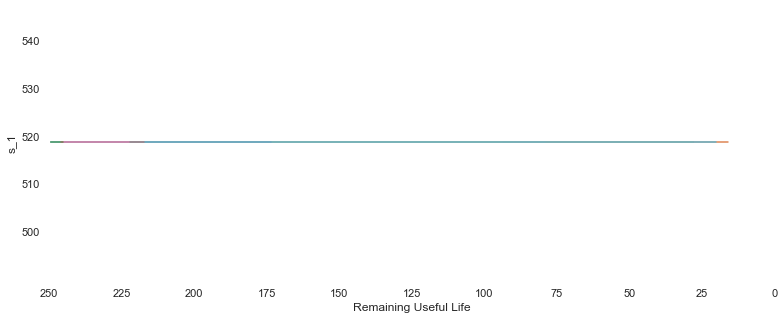

Plot of s_2 Vs RUL


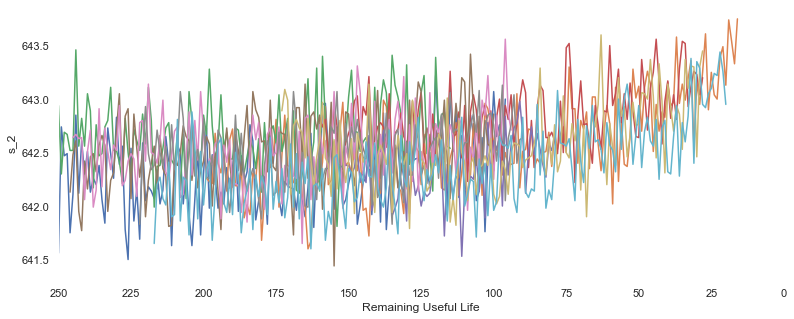

Plot of s_3 Vs RUL


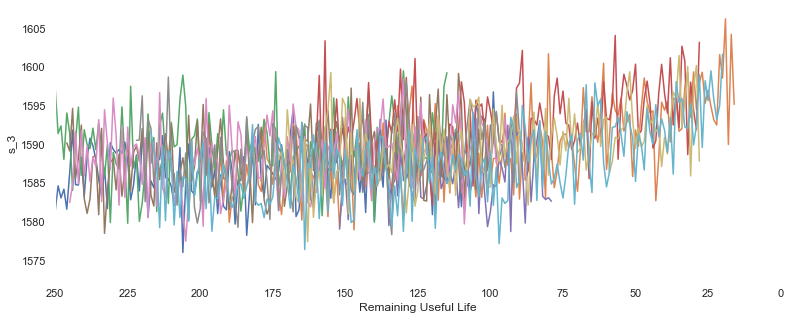

Plot of s_4 Vs RUL


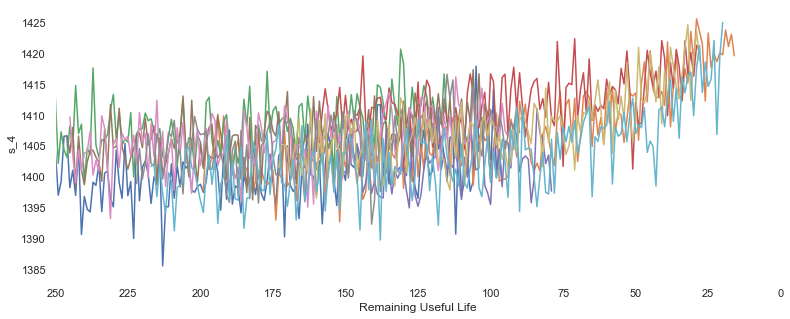

Plot of s_5 Vs RUL


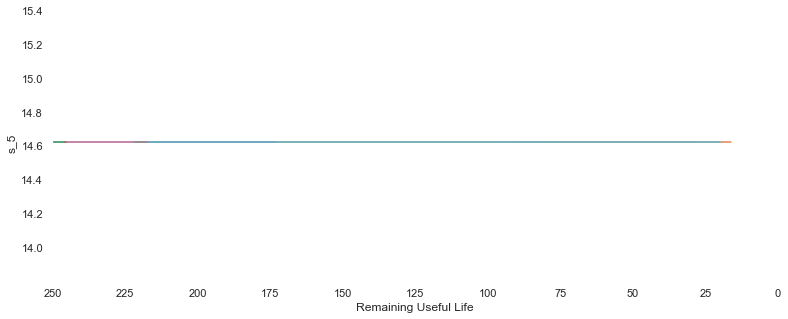

Plot of s_6 Vs RUL


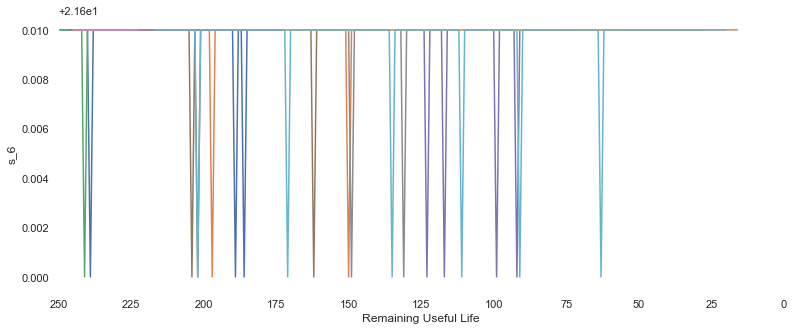

Plot of s_7 Vs RUL


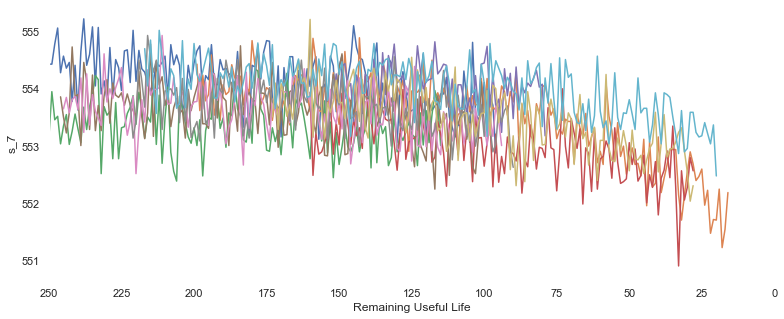

Plot of s_8 Vs RUL


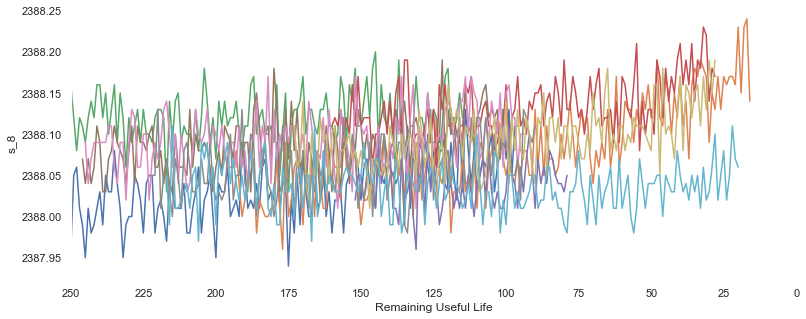

Plot of s_9 Vs RUL


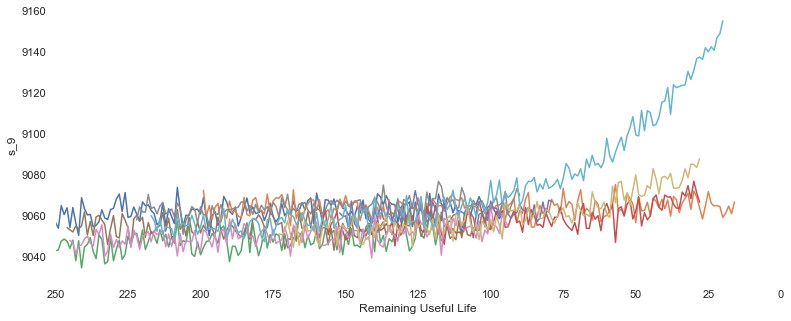

Plot of s_10 Vs RUL


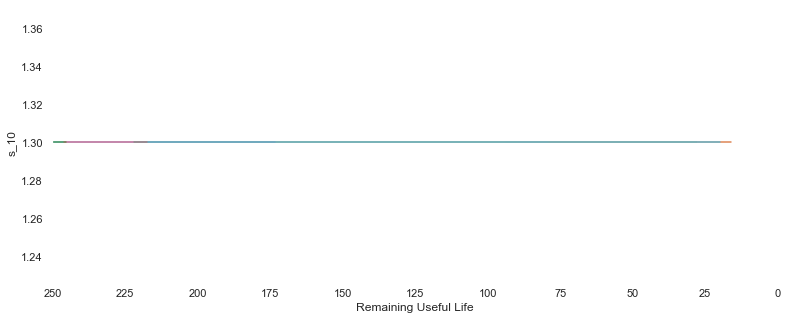

Plot of s_11 Vs RUL


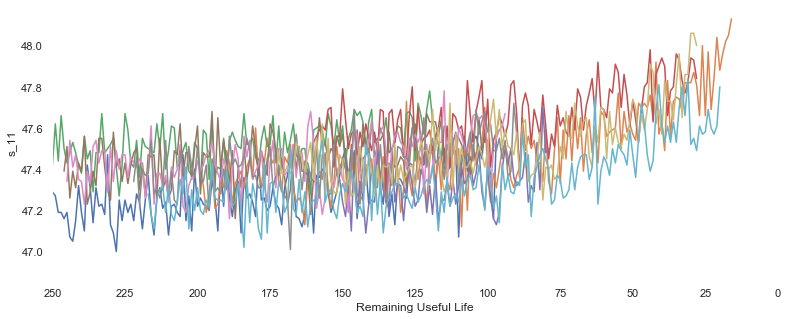

Plot of s_12 Vs RUL


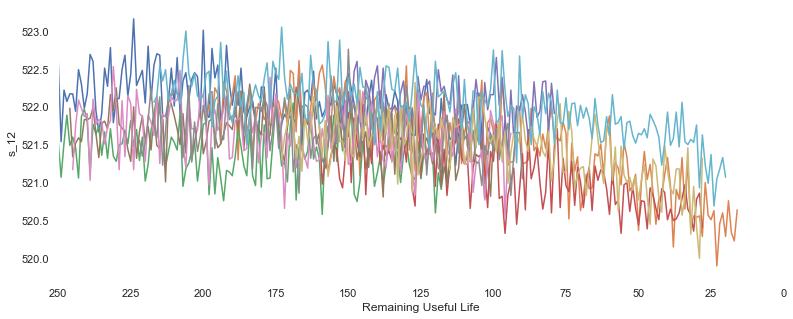

Plot of s_13 Vs RUL


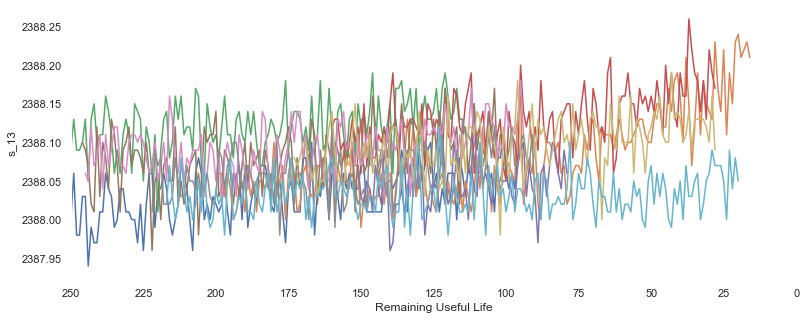

Plot of s_14 Vs RUL


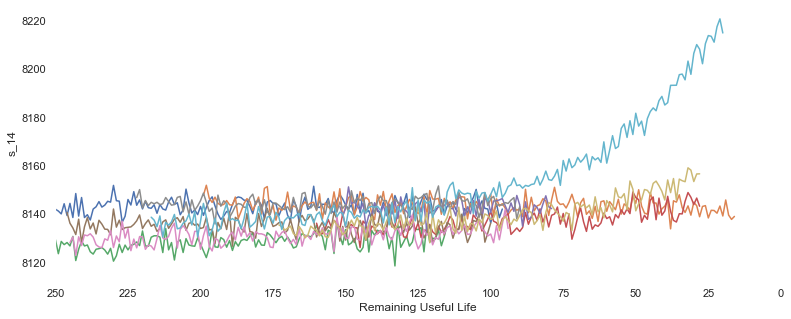

Plot of s_15 Vs RUL


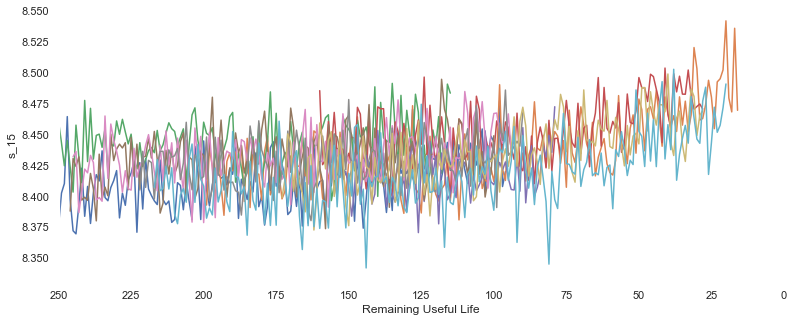

Plot of s_16 Vs RUL


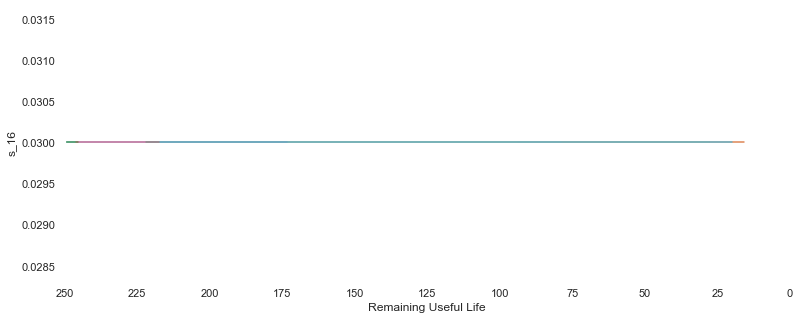

Plot of s_17 Vs RUL


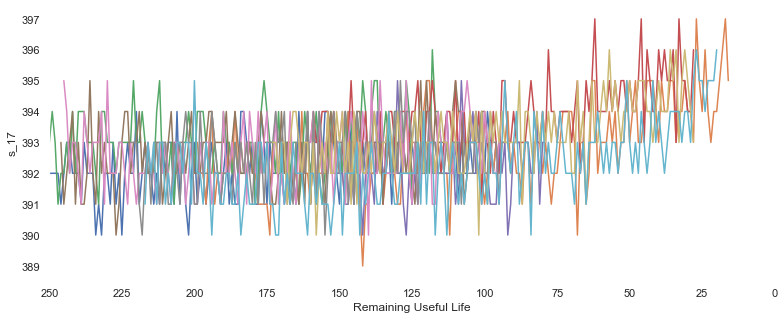

Plot of s_18 Vs RUL


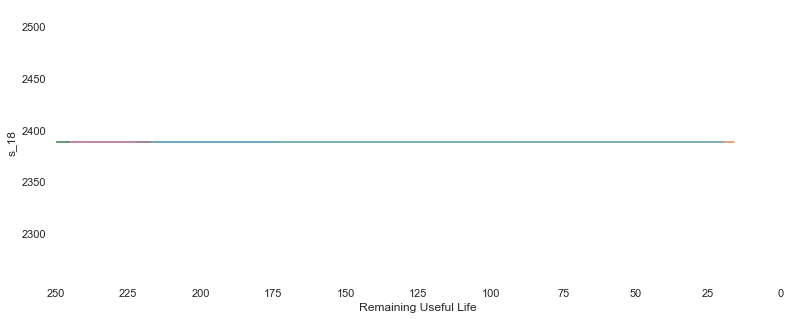

Plot of s_19 Vs RUL


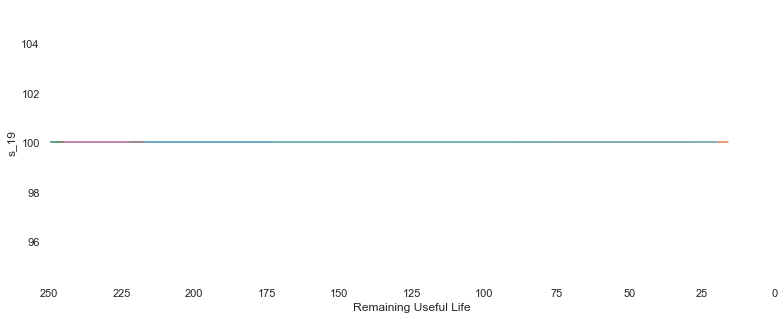

Plot of s_20 Vs RUL


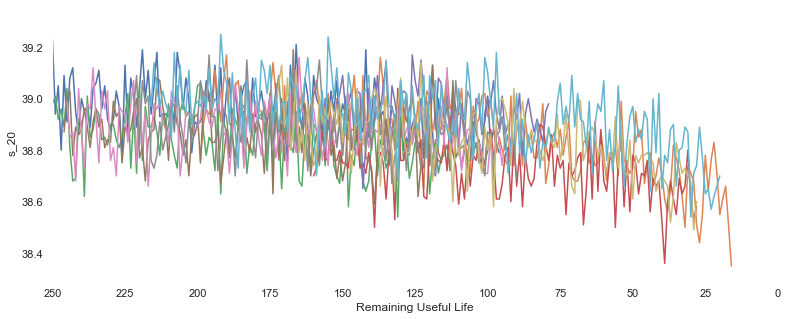

Plot of s_21 Vs RUL


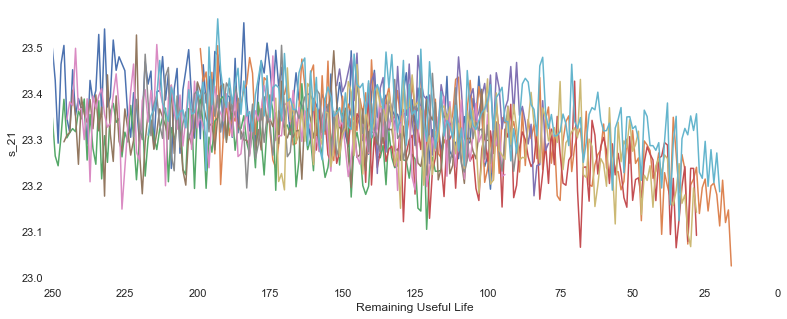

In [36]:
# Plot of Computed RUL Vs Sensors
for sensor in sensors:
    print("Plot of {} Vs RUL".format(sensor))
    plot_featues(sensor, test_df)

## test_df : RUL is with truth value and RUL_x is with available RUL in test data

## Compute Classes of [ 0 to 5days, 5 to 10days, 10 to 20days, 20 to 50days, 50+ days ]

In [142]:
df_train=result_frame.copy()
df_test=test_df.copy()


In [144]:
df_train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388   

    s_19   s_20     s_21  RUL  
0  100.0  39.06  23.4190  191  
1  100.0  39.00  23.4236  190  
2  100.0  38.95  23.3442  189  
3  100.0  38.88  23.3739  188  
4  100.0  38.90  23.4044  187  

[5 rows x 27 columns]

In [145]:
df_test.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     0.0023     0.0003      100.0  518.67  643.02   
1        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
2        1            3     0.0003     0.0001      100.0  518.67  642.46   
3        1            4     0.0042     0.0000      100.0  518.67  642.44   
4        1            5     0.0014     0.0000      100.0  518.67  642.51   

       s_3      s_4    s_5  ...  s_16  s_17  s_18   s_19   s_20     s_21  \
0  1585.29  1398.21  14.62  ...  0.03   392  2388  100.0  38.86  23.3735   
1  1588.45  1395.42  14.62  ...  0.03   393  2388  100.0  39.02  23.3916   
2  1586.94  1401.34  14.62  ...  0.03   393  2388  100.0  39.08  23.4166   
3  1584.12  1406.42  14.62  ...  0.03   391  2388  100.0  39.00  23.3737   
4  1587.19  1401.92  14.62  ...  0.03   390  2388  100.0  38.99  23.4130   

   max_cycle_test  RUL_x  RUL_y  RUL  
0              31     30    112  142  
1              31     29    112  141  
2              31     28    112  140  
3              31     27    112  139  
4              31     26    112  138  

[5 rows x 30 columns]

In [146]:
period=30
df_train['class_0_5'] = df_train['RUL'].apply(lambda x: 1 if x <= 5 else 0)
df_train['class_5_10'] = df_train['RUL'].apply(lambda x: 1 if x <= 10 & x > 5 else 0)
df_train['class_10_20'] = df_train['RUL'].apply(lambda x: 1 if x <= 20 & x > 10 else 0)
df_train['class_20_50'] = df_train['RUL'].apply(lambda x: 1 if x <= 50 & x >20 else 0)
df_train['class_50+'] = df_train['RUL'].apply(lambda x: 1 if x > 50 else 0)


unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...  s_18   s_19   s_20     s_21  RUL  class_0_5  \
0  1589.70  1400.60  14.62  ...  2388  100.0  39.06  23.4190  191          0   
1  1591.82  1403.14  14.62  ...  2388  100.0  39.00  23.4236  190          0   
2  1587.99  1404.20  14.62  ...  2388  100.0  38.95  23.3442  189          0   
3  1582.79  1401.87  14.62  ...  2388  100.0  38.88  23.3739  188          0   
4  1582.85  1406.22  14.62  ...  2388  100.0  38.90  23.4044  187          0   

   class_5_10  class_10_20  class_20_50  class_50+  
0           0            0            0          1  
1           0            0            0          1  
2           0            0            0          1  
3           0            0            0          1  
4           0            0            0          1  

[5 rows x 32 columns]

In [148]:
# Check the computed Classes
df_train.sample(20)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
3275        16          180     0.0045    -0.0003      100.0  518.67  643.52   
18823       92          309    -0.0029     0.0004      100.0  518.67  642.95   
2088        10          175     0.0029     0.0001      100.0  518.67  642.78   
11827       60           58    -0.0011    -0.0001      100.0  518.67  642.74   
9709        49          214     0.0002     0.0001      100.0  518.67  643.64   
7264        37          119     0.0024     0.0001      100.0  518.67  643.16   
2768        14           60     0.0004     0.0004      100.0  518.67  642.76   
19097       94           87     0.0006     0.0003      100.0  518.67  642.74   
2351        11          216    -0.0028     0.0001      100.0  518.67  643.10   
19850       96          299    -0.0004    -0.0001      100.0  518.67  642.91   
2703        13          158    -0.0024     0.0001      100.0  518.67  643.17   
13993       70            1     0.0021     0.0001      100.0  518.67  642.26   
4832        24          100    -0.0008     0.0000      100.0  518.67  642.95   
3372        17           68     0.0044     0.0001      100.0  518.67  642.72   
3710        18          130     0.0018     0.0002      100.0  518.67  642.77   
11237       56          258    -0.0013    -0.0002      100.0  518.67  643.34   
5585        28          121    -0.0001     0.0005      100.0  518.67  642.95   
15397       77           29    -0.0031     0.0003      100.0  518.67  642.53   
9844        50          134    -0.0027    -0.0004      100.0  518.67  642.75   
8921        46          127    -0.0014    -0.0002      100.0  518.67  642.57   

           s_3      s_4    s_5  ...  s_18   s_19   s_20     s_21  RUL  \
3275   1593.85  1424.52  14.62  ...  2388  100.0  38.59  23.0862   29   
18823  1602.00  1420.04  14.62  ...  2388  100.0  38.66  23.0973   32   
2088   1593.26  1412.11  14.62  ...  2388  100.0  38.67  23.2985   47   
11827  1588.23  1411.00  14.62  ...  2388  100.0  38.91  23.3908  114   
9709   1599.32  1427.87  14.62  ...  2388  100.0  38.46  23.1829    1   
7264   1588.24  1410.48  14.62  ...  2388  100.0  38.70  23.2130   51   
2768   1585.73  1403.56  14.62  ...  2388  100.0  38.84  23.3221  120   
19097  1591.85  1408.66  14.62  ...  2388  100.0  38.70  23.1790  171   
2351   1595.60  1419.40  14.62  ...  2388  100.0  38.68  23.1628   24   
19850  1608.62  1418.54  14.62  ...  2388  100.0  38.64  23.2477   37   
2703   1610.57  1427.79  14.62  ...  2388  100.0  38.58  23.1415    5   
13993  1588.45  1400.02  14.62  ...  2388  100.0  38.81  23.4180  136   
4832   1588.97  1409.36  14.62  ...  2388  100.0  38.72  23.2554   47   
3372   1590.12  1399.78  14.62  ...  2388  100.0  39.06  23.4402  208   
3710   1594.14  1398.72  14.62  ...  2388  100.0  38.90  23.3142   65   
11237  1594.54  1434.16  14.62  ...  2388  100.0  38.57  23.0347   17   
5585   1585.59  1411.61  14.62  ...  2388  100.0  38.80  23.3848   44   
15397  1591.34  1406.42  14.62  ...  2388  100.0  38.84  23.3505  125   
9844   1594.49  1414.12  14.62  ...  2388  100.0  38.81  23.3491   64   
8921   1576.26  1398.11  14.62  ...  2388  100.0  39.08  23.3481  129   

       class_0_5  class_5_10  class_10_20  class_20_50  class_50+  
3275           0           0            0            0          0  
18823          0           0            0            1          0  
2088           0           0            0            0          0  
11827          0           0            0            0          1  
9709           1           0            0            0          0  
7264           0           0            0            0          1  
2768           0           0            0            0          1  
19097          0           0            0            0          1  
2351           0           0            0            0          0  
19850          0           0            0            0          0  
2703           1           0            0   

# Correlation b/w features

In [37]:

engine_num=5
corr_all=result_frame.corr()# linear correlation between variables for all engines
#corr_num=df.loc[engine_num].drop('time',axis=1).corr() # linear correlation between variables for engine [engine_num]

In [38]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(20,20))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    #ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = pd.melt(corr_all.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']


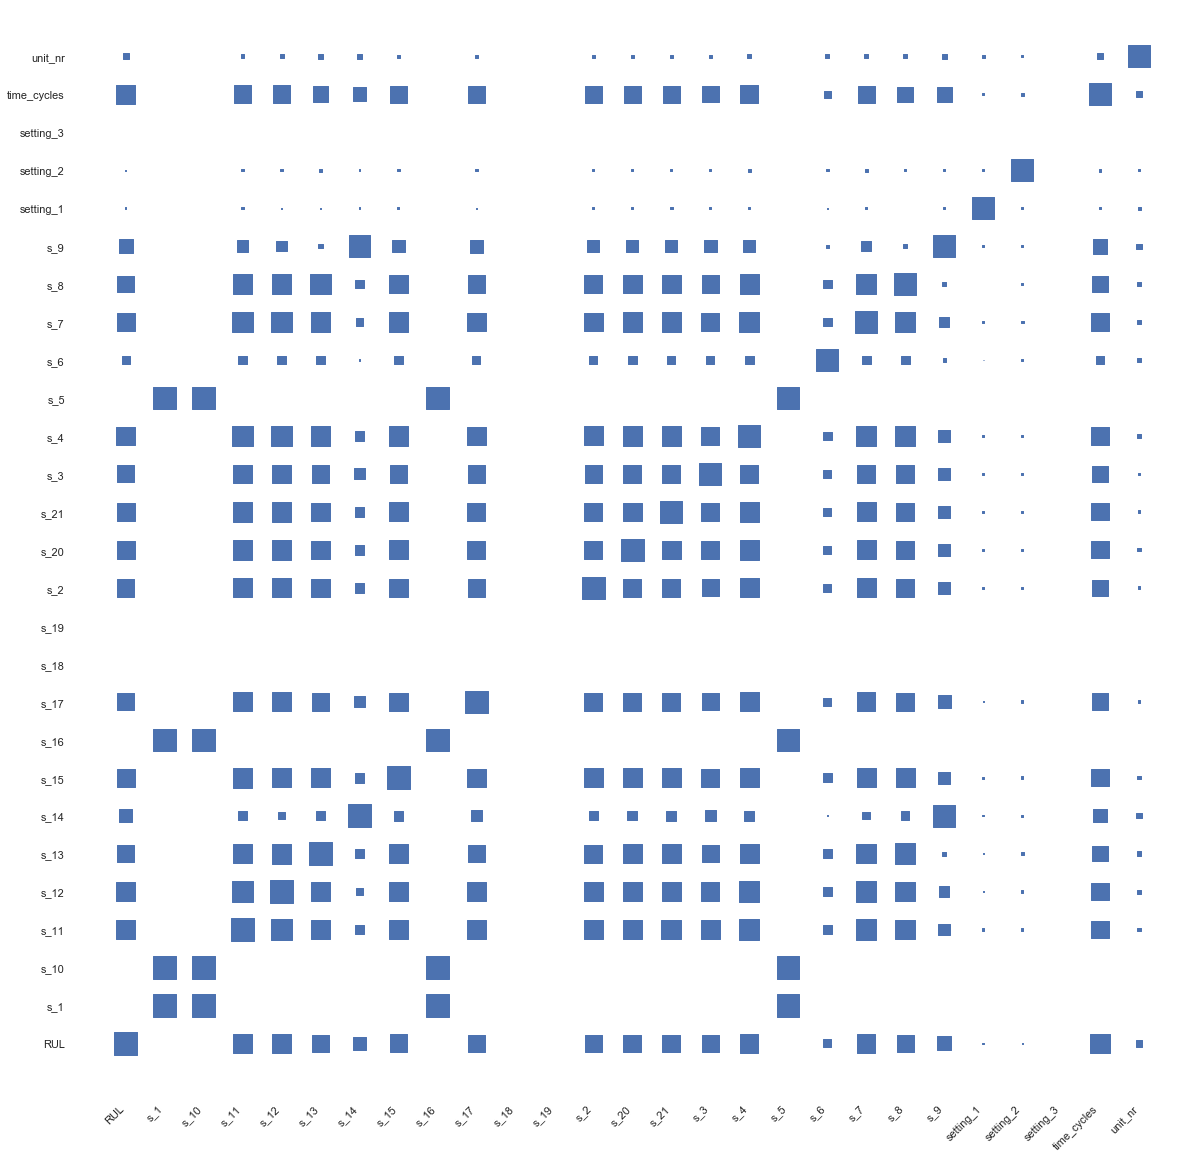

In [39]:
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## High Correlating pairs

In [40]:
def find_corr_pairs(corr,thrsh):
    high_corr_pairs = []
    # same as input 'corr' but the upper -triangle half of the matrix is zeros ( for convenience only) 
    corr_diag = pd.DataFrame(np.tril(corr.values), columns=corr.columns, index = corr.index)

    # check  the correlation between every pair of columns in the corr and keeps the high ones
    for col_num , col in enumerate(corr_diag):
        col_corr=corr_diag[col].iloc[col_num+1:] # this slicing ensures ignoring self_corr and duplicates due to symmetry
        # bool mask for pairs with high corr with col
        mask_pairs = col_corr.apply(lambda x: abs(x))>thrsh 
        idx_pairs=col_corr[mask_pairs].index

        # create list of high corr pairs
        for idx , corr in zip(idx_pairs,col_corr[mask_pairs].values):
            high_corr_pairs.append((col, idx, corr))
    
    return high_corr_pairs

In [41]:
corr_pairs=find_corr_pairs(corr_all,0.8)
for c in corr_pairs:
    print(c)

('s_1', 's_5', 1.0)
('s_1', 's_10', 1.0)
('s_1', 's_16', 1.0)
('s_4', 's_11', 0.8301356963159666)
('s_4', 's_12', -0.8155905161052416)
('s_5', 's_10', 1.0)
('s_5', 's_16', 1.0)
('s_7', 's_11', -0.8228050249957727)
('s_7', 's_12', 0.8127126013254434)
('s_8', 's_13', 0.8260843322358152)
('s_9', 's_14', 0.9631566003059564)
('s_10', 's_16', 1.0)
('s_11', 's_12', -0.8468835930051064)


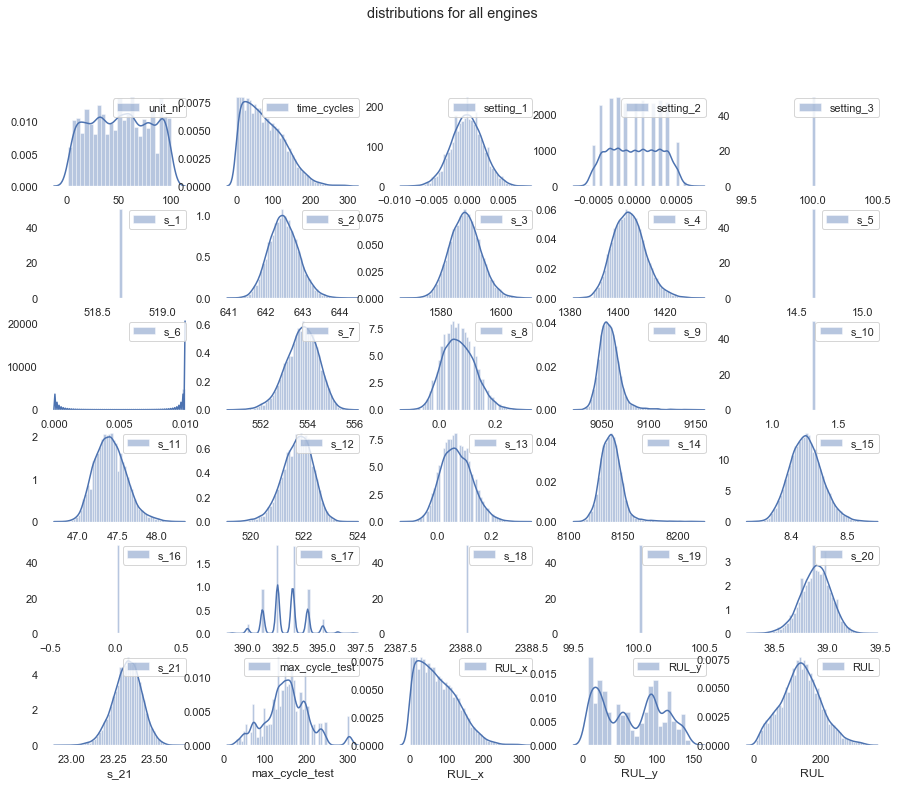

In [44]:

fig=plot_dist(test_df)

# Linear Regression model ( all engines)

In [45]:
# first create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [46]:
result_frame.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388   

    s_19   s_20     s_21  RUL  
0  100.0  39.06  23.4190  191  
1  100.0  39.00  23.4236  190  
2  100.0  38.95  23.3442  189  
3  100.0  38.88  23.3739  188  
4  100.0  38.90  23.4044  187  

[5 rows x 27 columns]

In [85]:
# drop unwanted columns and split target variable from training set
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_timecycles = ['time_cycles']
drop_labels = drop_timecycles+setting_names+drop_sensors

X_train = result_frame.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

In [86]:
X_test = test_df.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [87]:
X_test.head()

unit_nr     s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0        1  642.58  1581.22  1398.91  554.42  2388.08  9056.40  47.23  521.79   
1        2  642.55  1586.59  1410.83  553.52  2388.10  9044.77  47.67  521.74   
2        3  642.88  1589.75  1418.89  552.59  2388.16  9049.26  47.88  520.83   
3        4  642.78  1594.53  1406.88  552.64  2388.13  9051.30  47.65  521.88   
4        5  642.27  1589.94  1419.36  553.29  2388.10  9053.99  47.46  521.00   

      s_13     s_14    s_15  s_17   s_20     s_21  max_cycle_test  RUL_x  \
0  2388.06  8130.11  8.4024   393  38.81  23.3552              31      0   
1  2388.09  8126.90  8.4505   391  38.81  23.2618              49      0   
2  2388.14  8131.46  8.4119   395  38.93  23.2740             126      0   
3  2388.11  8133.64  8.4634   395  38.58  23.2581             106      0   
4  2388.15  8125.74  8.4362   394  38.75  23.4117              98      0   

   RUL_y  RUL  
0    112  112  
1     98   98  
2     69   69  
3     82   82  
4     91   91

In [88]:

drop_testfeatures = ['max_cycle_test', 'RUL_x' , 'RUL_y', 'RUL']
#drop_testlabels = drop_testfeatures
X_test_lr = X_test.drop(drop_testfeatures, axis=1)
X_test_lr.columns

Index(['unit_nr', 's_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')

In [89]:
Y_test_lr = X_test.pop('RUL')

In [58]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_pred_lr = lm.predict(X_test_lr)
evaluate(Y_test_lr, y_pred_lr)

train set RMSE:44.2569436415907, R2:0.5871568101465752
test set RMSE:31.902342178590995, R2:0.4106333005804803


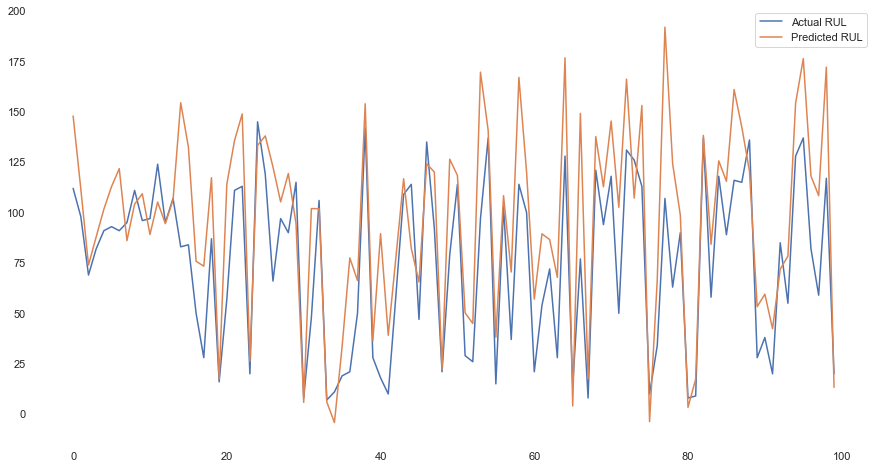

In [59]:
#t = linspace(0,2*math.pi,400)
plt.figure(figsize=(15,8))
plt.plot(Y_test_lr, label='Actual RUL')
plt.plot(y_pred_lr, label='Predicted RUL')

plt.legend()
plt.show()


# Poly Regression (all engines)

In [67]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

In [68]:
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_lr_poly = polynomial_features.fit_transform(X_test_lr)

In [373]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train_poly)
evaluate(y_train, y_hat_train, 'train')

y_pred_poly_lr = lm.predict(X_test_lr_poly)
evaluate(Y_test_lr, y_pred_poly_lr)

train set RMSE:41.636808625558125, R2:0.6345927527005493
test set RMSE:31.307086017035758, R2:0.43242174459607374


In [131]:
len(y_pred_poly_lr)

100

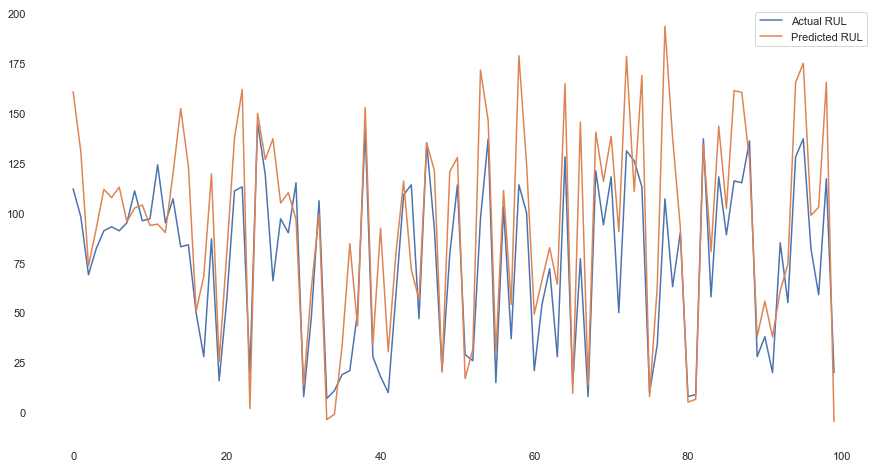

In [374]:

plt.figure(figsize=(15,8))
plt.plot(Y_test_lr, label='Actual RUL')
plt.plot(y_pred_poly_lr, label='Predicted RUL')

plt.legend()
plt.show()

# Linear Regression with modified RUL

In [63]:
y_train_modified = y_train.clip(upper=125)
y_train_modified.sample(20)

In [65]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_modified)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_modified, y_hat_train, 'train')

y_pred_lr = lm.predict(X_test_lr)
evaluate(Y_test_lr, y_pred_lr)

train set RMSE:21.427152115793266, R2:0.7356216678490364
test set RMSE:21.852875495647574, R2:0.7234602036955922


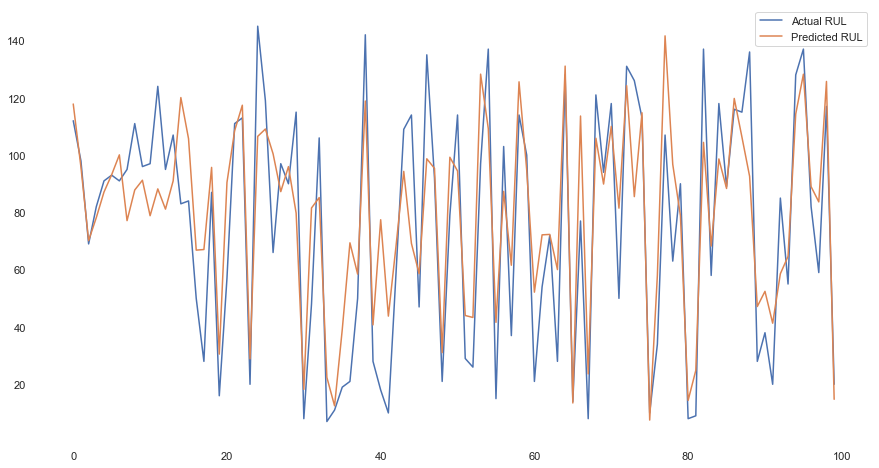

In [66]:
plt.figure(figsize=(15,8))
plt.plot(Y_test_lr, label='Actual RUL')
plt.plot(y_pred_lr, label='Predicted RUL')

plt.legend()
plt.show()

# Poly Regression (degree 2 with Modified RUL)

In [69]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train_poly, y_train_modified)

# predict and evaluate
y_hat_train = lm.predict(X_train_poly)
evaluate(y_train_modified, y_hat_train, 'train')

y_pred_poly_lr = lm.predict(X_test_lr_poly)
evaluate(Y_test_lr, y_pred_poly_lr)

train set RMSE:19.407419286516777, R2:0.7831134950801537
test set RMSE:20.18299385920139, R2:0.7641088585261093


In [79]:
y_pred_poly_lr.shape

(100,)

In [77]:
X_test.head()

unit_nr     s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0        1  642.58  1581.22  1398.91  554.42  2388.08  9056.40  47.23  521.79   
1        2  642.55  1586.59  1410.83  553.52  2388.10  9044.77  47.67  521.74   
2        3  642.88  1589.75  1418.89  552.59  2388.16  9049.26  47.88  520.83   
3        4  642.78  1594.53  1406.88  552.64  2388.13  9051.30  47.65  521.88   
4        5  642.27  1589.94  1419.36  553.29  2388.10  9053.99  47.46  521.00   

      s_13     s_14    s_15  s_17   s_20     s_21  max_cycle_test  RUL_x  \
0  2388.06  8130.11  8.4024   393  38.81  23.3552              31      0   
1  2388.09  8126.90  8.4505   391  38.81  23.2618              49      0   
2  2388.14  8131.46  8.4119   395  38.93  23.2740             126      0   
3  2388.11  8133.64  8.4634   395  38.58  23.2581             106      0   
4  2388.15  8125.74  8.4362   394  38.75  23.4117              98      0   

   RUL_y  
0    112  
1     98  
2     69  
3     82  
4     91

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
X_test.shape

unit_nr     s_2      s_3      s_4     s_7      s_8      s_9   s_11  \
0         1  642.58  1581.22  1398.91  554.42  2388.08  9056.40  47.23   
1         2  642.55  1586.59  1410.83  553.52  2388.10  9044.77  47.67   
2         3  642.88  1589.75  1418.89  552.59  2388.16  9049.26  47.88   
3         4  642.78  1594.53  1406.88  552.64  2388.13  9051.30  47.65   
4         5  642.27  1589.94  1419.36  553.29  2388.10  9053.99  47.46   
..      ...     ...      ...      ...     ...      ...      ...    ...   
95       96  642.30  1590.88  1397.94  553.99  2388.03  9062.41  47.14   
96       97  642.59  1582.96  1410.92  554.05  2388.06  9076.36  47.38   
97       98  642.68  1599.51  1415.47  553.44  2388.13  9062.34  47.66   
98       99  642.00  1585.03  1397.98  554.75  2388.01  9067.16  47.26   
99      100  642.95  1601.62  1424.99  552.48  2388.06  9155.03  47.80   

      s_12     s_13     s_14    s_15  s_17   s_20     s_21  max_cycle_test  \
0   521.79  2388.06  8130.11  8.4024   393  38.81  23.3552              31   
1   521.74  2388.09  8126.90  8.4505   391  38.81  23.2618              49   
2   520.83  2388.14  8131.46  8.4119   395  38.93  23.2740             126   
3   521.88  2388.11  8133.64  8.4634   395  38.58  23.2581             106   
4   521.00  2388.15  8125.74  8.4362   394  38.75  23.4117              98   
..     ...      ...      ...     ...   ...    ...      ...             ...   
95  522.30  2388.01  8148.24  8.4110   391  38.96  23.4606              97   
96  521.58  2388.06  8155.48  8.4500   395  38.61  23.2953             134   
97  521.53  2388.09  8146.39  8.4235   394  38.76  23.3608             121   
98  521.82  2388.02  8150.38  8.4003   391  38.95  23.3595              97   
99  521.07  2388.05  8214.64  8.4903   396  38.70  23.1855             198   

    RUL_x  RUL_y  
0       0    112  
1       0     98  
2       0     69  
3       0     82  
4       0     91  
..    ...    ...  
95      0    137  
96      0     82  
97      0     59  
98      0    117  
99      0     20  

[100 rows x 18 columns]

In [156]:
# random forest
rf = RandomForestRegressor(n_estimators=100 , max_features="sqrt", random_state=42, 
                           max_depth=10, min_samples_leaf=50)
rf.fit(X_train, y_train_modified)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [157]:
# predict and evaluate
y_hat_train = rf.predict(X_train)
evaluate(y_train_modified, y_hat_train, 'train')

y_hat_test = rf.predict(X_test_lr)
evaluate(Y_test_lr, y_hat_test)

train set RMSE:17.461767879370367, R2:0.8244206752089518
test set RMSE:18.00544137636906, R2:0.8122638101001587


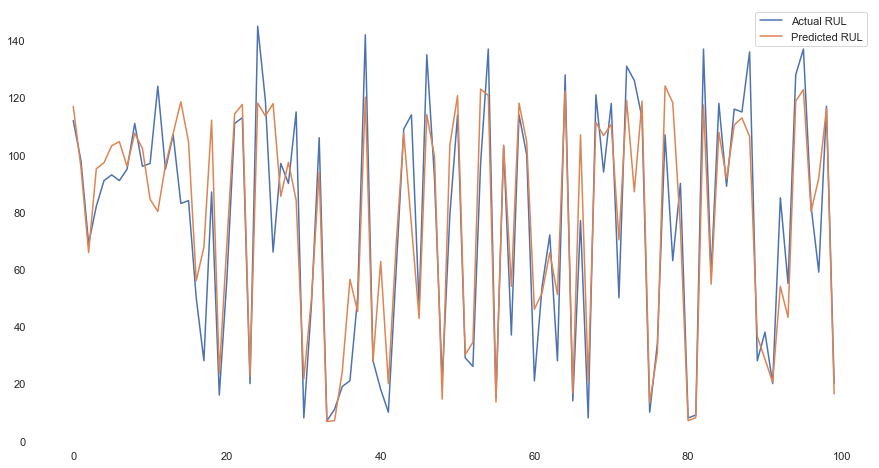

In [92]:
plt.figure(figsize=(15,8))
plt.plot(Y_test_lr, label='Actual RUL')
plt.plot(y_hat_test, label='Predicted RUL')

plt.legend()
plt.show()

In [122]:
list(np.round(np.linspace(0, 2, 81), decimals=3)) 

[0.0,
 0.025,
 0.05,
 0.075,
 0.1,
 0.125,
 0.15,
 0.175,
 0.2,
 0.225,
 0.25,
 0.275,
 0.3,
 0.325,
 0.35,
 0.375,
 0.4,
 0.425,
 0.45,
 0.475,
 0.5,
 0.525,
 0.55,
 0.575,
 0.6,
 0.625,
 0.65,
 0.675,
 0.7,
 0.725,
 0.75,
 0.775,
 0.8,
 0.825,
 0.85,
 0.875,
 0.9,
 0.925,
 0.95,
 0.975,
 1.0,
 1.025,
 1.05,
 1.075,
 1.1,
 1.125,
 1.15,
 1.175,
 1.2,
 1.225,
 1.25,
 1.275,
 1.3,
 1.325,
 1.35,
 1.375,
 1.4,
 1.425,
 1.45,
 1.475,
 1.5,
 1.525,
 1.55,
 1.575,
 1.6,
 1.625,
 1.65,
 1.675,
 1.7,
 1.725,
 1.75,
 1.775,
 1.8,
 1.825,
 1.85,
 1.875,
 1.9,
 1.925,
 1.95,
 1.975,
 2.0]

In [123]:
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from sklearn.model_selection import GridSearchCV
max_depth = [None] + list(range(3, 34, 3))  # 
min_samples_leaf = list(range(1, 102, 10))  # with crude tweaking we set this to 50, for grid search I'll allow double
min_impurity_decrease = list(np.arange(0,147)/10)  
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))  

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    #'ccp_alpha': ccp_alpha
}

In [124]:
tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print(tuning_options)

1571724


In [125]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [126]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = gkf.split(result_frame, groups=result_frame['unit_nr']), n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train_modified)

In [ ]:
print(regressor.best_params_)
print(regressor.best_score_)